#Characterization of Patient Instances in a Hepatitis C Dataset                                  
*Author*                                                                   
Soumya Nayak

#Abstract

This notebook delves into the characterization of instances within a medical dataset aimed at classifying patients into categories of blood donors or Hepatitis C patients, which encompasses the stages of 'just' Hepatitis C, Fibrosis, and Cirrhosis. The dataset primarily consists of laboratory values pertinent to blood donors and Hepatitis C patients, along with demographic attributes such as age. Through rigorous analysis and exploration, this study elucidates the intrinsic nature of the instances represented in the dataset, shedding light on the essential features and attributes that contribute to the accurate classification of patients in the context of Hepatitis C diagnosis and prognosis.

# Dataset

The data set contains laboratory values of blood donors and Hepatitis C patients and demographic values like age. The data was obtained from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/HCV+data
Content
All attributes except Category and Sex are numerical.
Attributes 1 to 4 refer to the data of the patient:

1. X (Patient ID/No.)
2. Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis')
3. Age (in years)
4. Sex (f,m)
Attributes 5 to 14 refer to laboratory data:
5. ALB: Albumin level
6. ALP: Alkaline phosphatase level
7. ALT: Alanine transaminase level
8. AST: Aspartate transaminase level
9. BIL: Bilirubin level
10. CHE: Acetylcholinesterase level
11. CHOL: Cholesterol level
12. CREA: Creatinine level
13. GGT: Gamma-glutamyl transferase level
14. PROT: Total protein level

The target attribute for classification is Category


#Objective
This assignment is focused on developing a comprehensive machine learning (ML) project encompassing the following key tasks:

1. Data Quality Assessment and Cleaning: Evaluating and addressing data quality issues such as handling missing data to ensure the dataset is suitable for analysis.

2. Exploratory Data Analysis (EDA): Analyzing the distribution of data to gain insights into its characteristics and patterns.

3. Feature Selection: Identifying and selecting important features that significantly contribute to predicting the target variables.

4. Model Building and Evaluation: Training ML models, selecting the best-performing model, and optimizing hyperparameters to enhance model performance.

5. Model Interpretation: Interpreting the results of different models to understand their predictive capabilities and limitations.

6. Visualization and Reporting: Supporting the analysis with effective visualizations and creating comprehensive reports to communicate findings and insights effectively.

In [ ]:
#!pip install requests
#!pip install tabulate
#!pip install "colorama>=0.3.8"
!pip install h2o
!pip install fitter
!pip install eli5
!pip install mlxtend

import csv
import json
import logging
import optparse
import os
import random
import sys
import time
from datetime import datetime
from distutils.util import strtobool

# Importing all the libararies required for the assignment
import h2o
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psutil
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch
from matplotlib.pyplot import figure
import random, os, sys
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

sns.set(rc={"figure.figsize": (16, 8)})

# Data Imputation
!pip install fancyimpute
from fancyimpute import IterativeImputer as MICE

# Model Interpretation
!pip install shap
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.impute import SimpleImputer, KNNImputer
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import pylab
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import roc_curve, auc
from h2o.estimators.glm import H2OGeneralizedLinearEstimator


  Using cached eli5-0.13.0-py2.py3-none-any.whl
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 2.6 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29881 sha256=7fa3ff9d1bd1dfedede6a83c024ab1e5f5f91bb4195505fa2ae671f2a218b006
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=be9462e2147d168b70c7a45989ce258b956a8000f76a8e63a6d774238b0c1b03
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.4 MB/s eta 0:00:00


In [ ]:
#Reading the dataset
github_url = "https://github.com//SoumyaNayakk/DSEM/blob/main/hcvdat0.csv?raw=true"
df_pd = pd.read_csv(github_url)
df_pd.head()

Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7

In [ ]:
# 1. Drop unnnecessary fields that wont contribute to the prediction like ID
df_pd.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
df_pd.shape

(611, 13)

In [ ]:
# List Features & its data type
# here column 'Category' describe the categorical data that tells if the blood sample has Hepatitis C
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  611 non-null    object 
 1   Age       611 non-null    int64  
 2   Sex       611 non-null    object 
 3   ALB       611 non-null    float64
 4   ALP       594 non-null    float64
 5   ALT       610 non-null    float64
 6   AST       611 non-null    float64
 7   BIL       611 non-null    float64
 8   CHE       611 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      611 non-null    float64
 11  GGT       611 non-null    float64
 12  PROT      610 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.2+ KB


In [ ]:
# categorical data
categorical_data = df_pd.select_dtypes(["object"]).columns.tolist()
categorical_data

['Category', 'Sex']

In [ ]:
# numerical data
numerical_data = df_pd.select_dtypes(["float64","int64"]).columns.tolist()
numerical_data

['Age',
 'ALB',
 'ALP',
 'ALT',
 'AST',
 'BIL',
 'CHE',
 'CHOL',
 'CREA',
 'GGT',
 'PROT']

In [ ]:
# describe the dataset
df_pd.describe().transpose().style.background_gradient(cmap = 'GnBu')

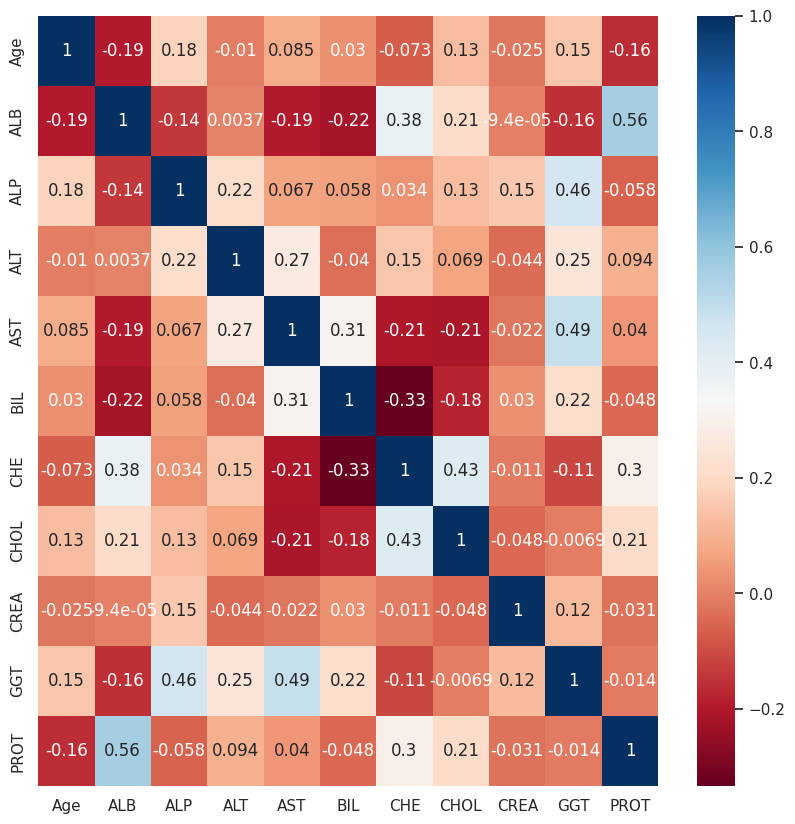

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_pd.corr(), cmap="RdBu", annot=True)
plt.show()

#observation
The correlated variables are 1)Prot and Alb         
2)Category  and AST                 
3)ALP and GGT                
4)AST and GGT                
5) GGT and Category

In [ ]:
# Check for duplicate records: No duplicate record exists
df_pd.duplicated().sum()

0

In [ ]:
# Checking for % of Missing Values: There are missing values in features as resulted below
df_pd.isnull().sum()

Category     0
Age          0
Sex          0
ALB          0
ALP         17
ALT          1
AST          0
BIL          0
CHE          0
CHOL         6
CREA         0
GGT          0
PROT         1
dtype: int64

<Axes: >

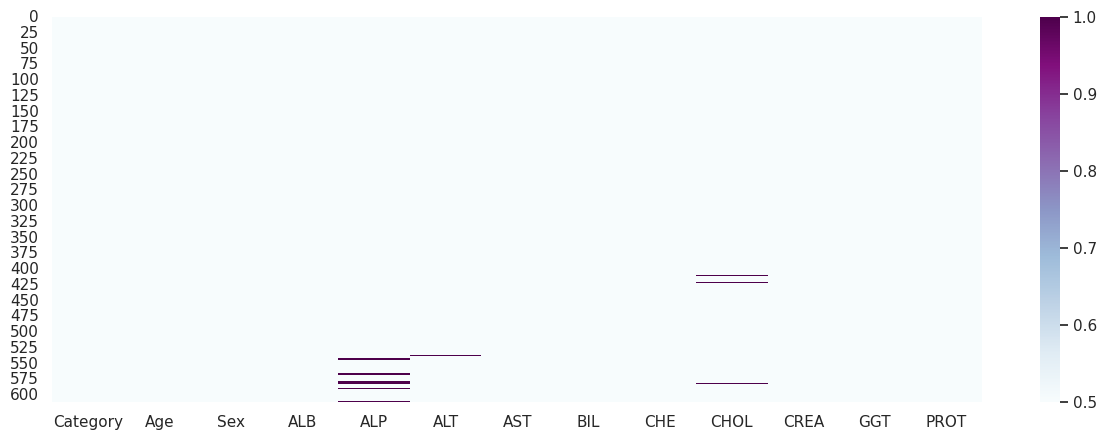

In [ ]:
# plot the count of missing valkues in feature
plt.figure(figsize=(15,5))
sns.heatmap(df_pd.isnull(),cmap='BuPu',vmin=0.5, vmax=1)

In [ ]:
# percentage of missing values in the data set
count_null = 0
len_df = 0
for col in df_pd.columns:
    null = 0
    l = 0
    null = df_pd[col].isnull().sum()
    l = len(df_pd[col])
    count_null=count_null + null
    len_df = len_df + l
print('Percentage of missing Values: ', np.ceil(100*count_null/len_df))

Percentage of missing Values:  1.0


In [ ]:
# percentage of missing values in each feature
df_missing_values = pd.DataFrame({'percentage':round((df_pd.isnull().mean())*100,4)})
df_missing_values.sort_values(by = 'percentage', ascending = False).style.background_gradient(cmap='summer')

In [ ]:
def impute_data(df_pd):
    # Replace null values for numeriacal data with median of that feature.
    cols_num = ["ALP", "ALT", "CHOL", "PROT" ]
    for col in cols_num:
        df_pd[col].fillna(df_pd[col].median(), inplace = True)



    return df_pd

In [ ]:
df_pd = impute_data(df_pd)

<Axes: >

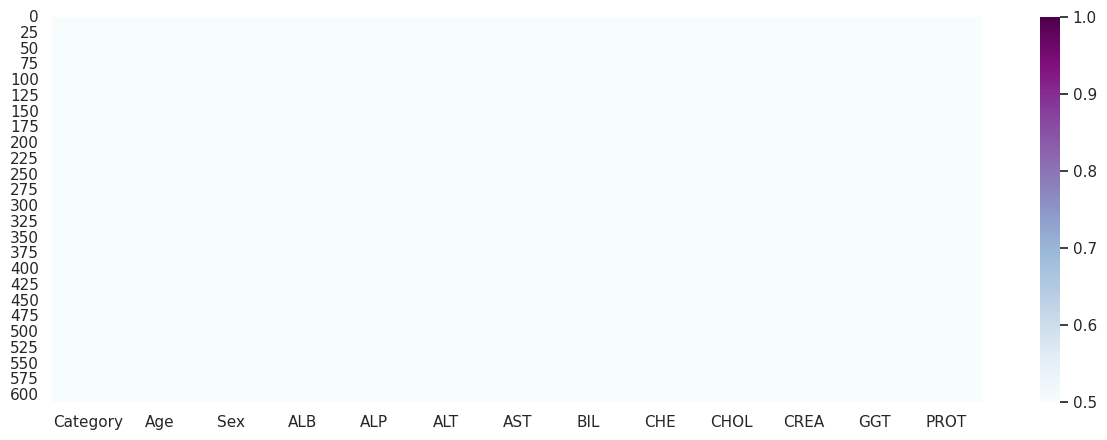

In [ ]:
# plot the count of missing values in feature after imputing the data
plt.figure(figsize=(15,5))
sns.heatmap(df_pd.isnull(),cmap='BuPu',vmin=0.5, vmax=1)

We see from above that dataset contains 2 types of data.

Categorical data - ['Category', 'Sex']                    
Numerical Data - ['Age',
 'ALB',
 'ALP',
 'ALT',
 'AST',
 'BIL',
 'CHE',
 'CHOL',
 'CREA',
 'GGT',
 'PROT']
Upon analysis, it is observed that there are gaps in the data for certain features crucial for prediction.

To address these gaps, we have two options: either eliminate the incomplete records or fill in the missing data. However, due to the limited size of our dataset, discarding records with missing values is not feasible. Therefore, we opt for imputation by replacing missing values with either the mean or the most frequently occurring data point (mode) of the respective feature.

For numerical data, we choose to impute using the median instead of the mean to prevent bias caused by outliers.

0      32
1      32
2      32
3      32
4      32
       ..
606    62
607    64
608    64
609    46
610    59
Name: Age, Length: 611, dtype: int64


<Figure size 800x500 with 0 Axes>

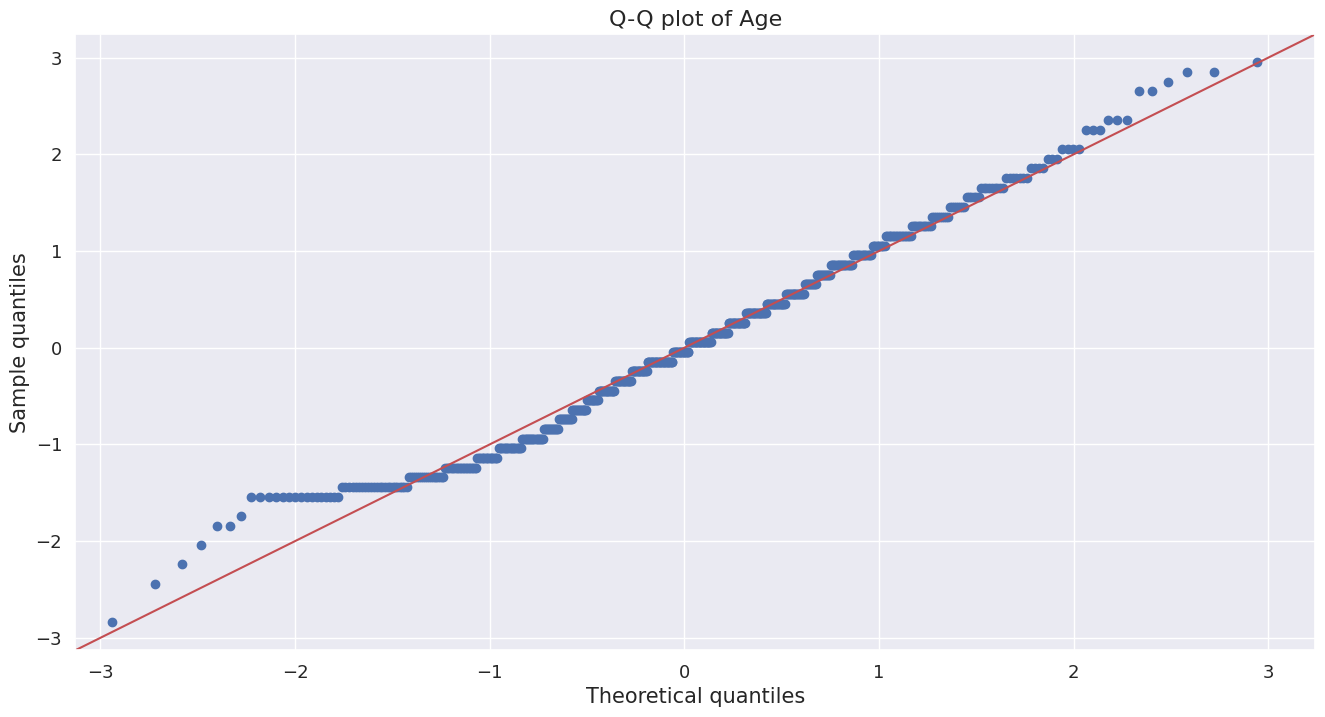

0      38.5
1      38.5
2      46.9
3      43.2
4      39.2
       ... 
606    32.0
607    24.0
608    29.0
609    33.0
610    36.0
Name: ALB, Length: 611, dtype: float64


<Figure size 800x500 with 0 Axes>

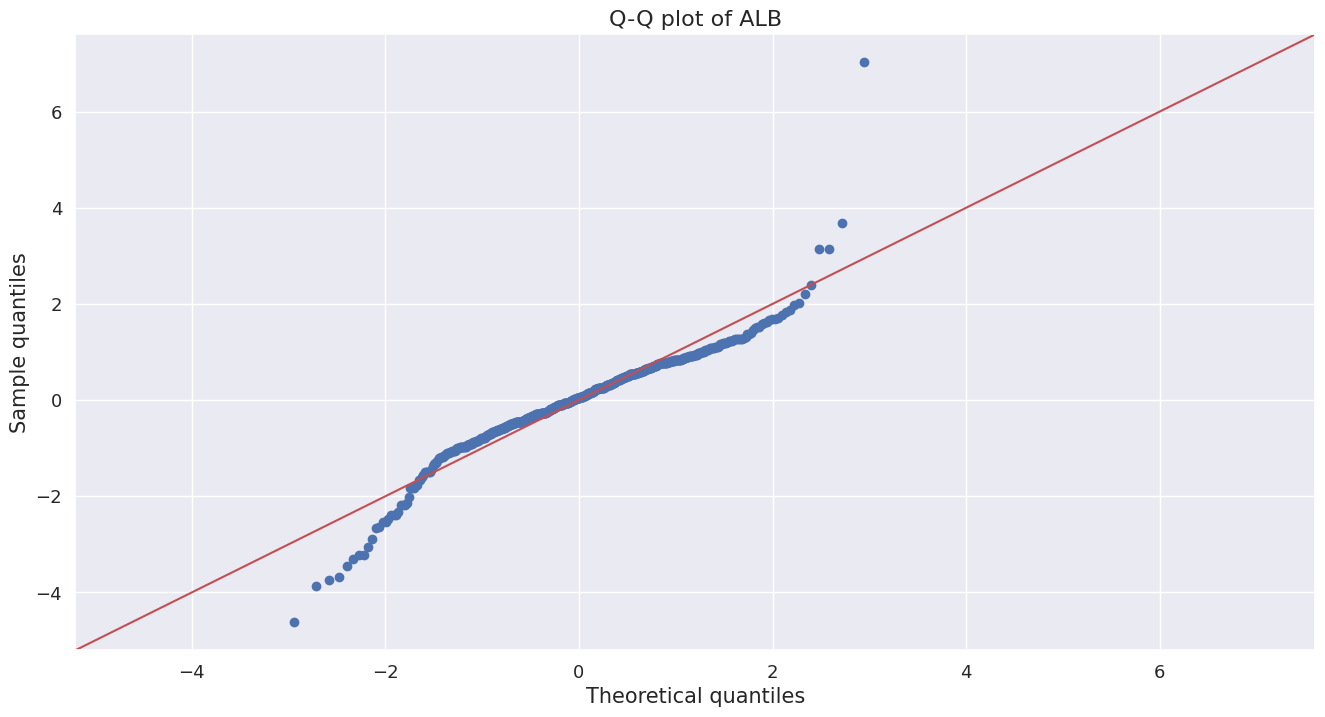

0       52.50
1       70.30
2       74.70
3       52.00
4       74.10
        ...  
606    416.60
607    102.80
608     87.30
609     66.25
610     66.25
Name: ALP, Length: 611, dtype: float64


<Figure size 800x500 with 0 Axes>

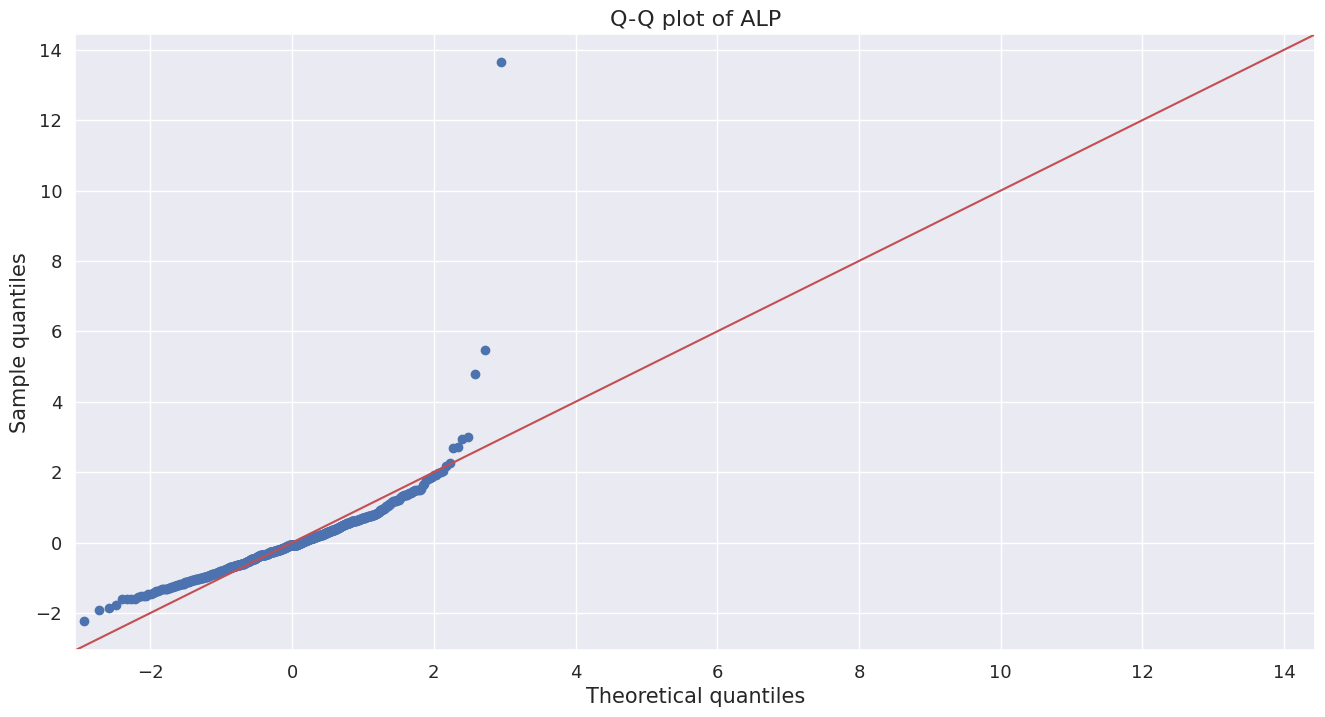

0        7.7
1       18.0
2       36.2
3       30.6
4       32.6
       ...  
606      5.9
607      2.9
608      3.5
609     39.0
610    100.0
Name: ALT, Length: 611, dtype: float64


<Figure size 800x500 with 0 Axes>

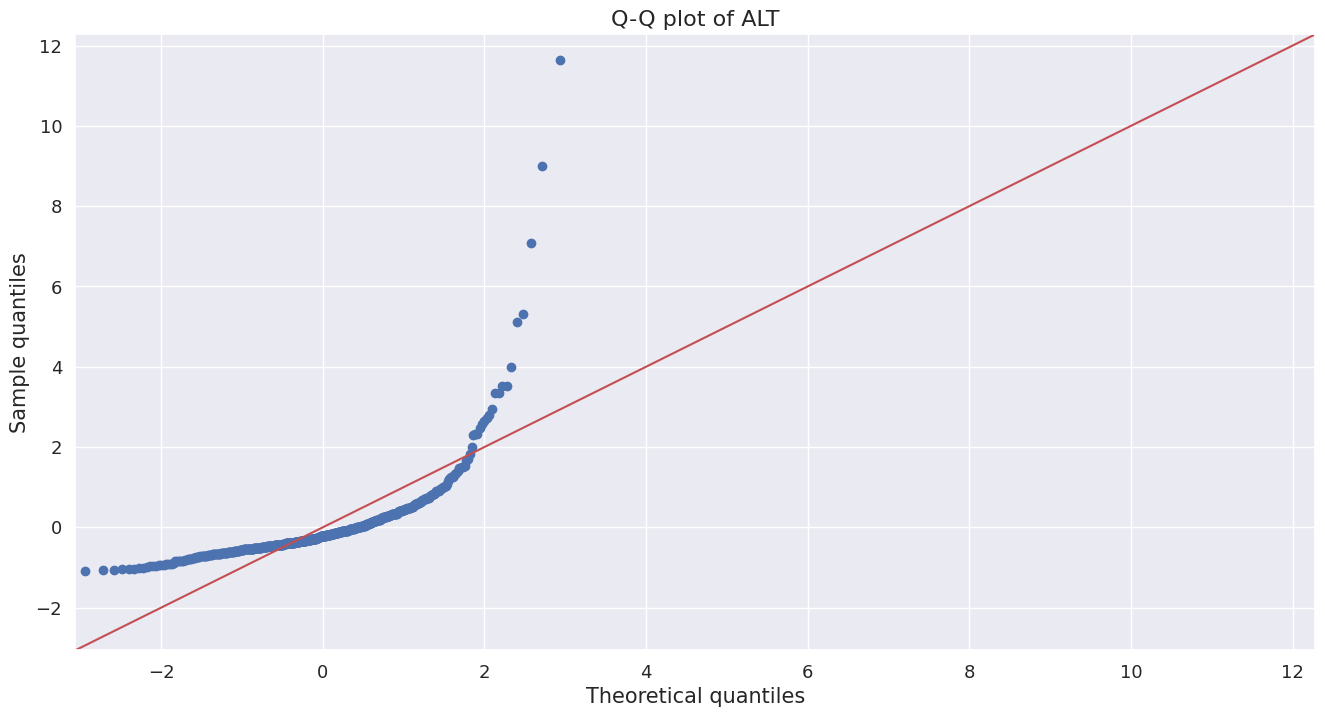

0       22.1
1       24.7
2       52.6
3       22.6
4       24.8
       ...  
606    110.3
607     44.4
608     99.0
609     62.0
610     80.0
Name: AST, Length: 611, dtype: float64


<Figure size 800x500 with 0 Axes>

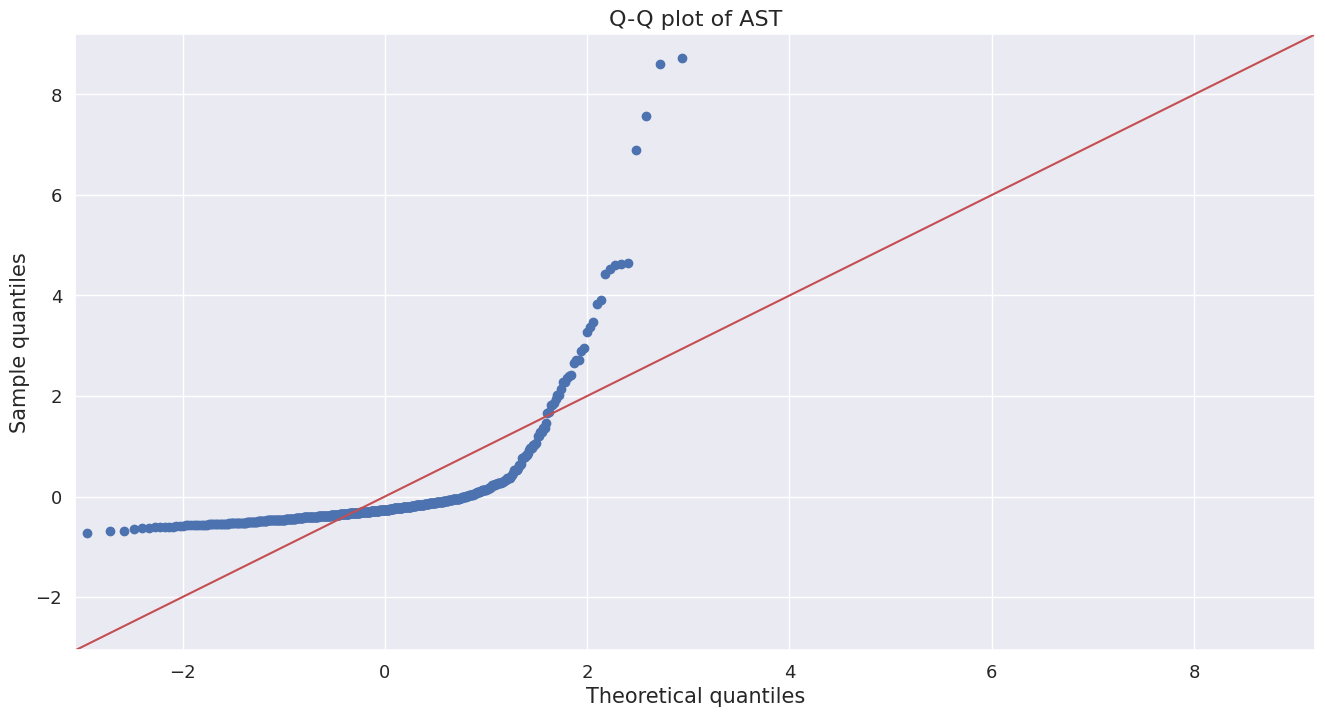

0       7.5
1       3.9
2       6.1
3      18.9
4       9.6
       ... 
606    50.0
607    20.0
608    48.0
609    20.0
610    12.0
Name: BIL, Length: 611, dtype: float64


<Figure size 800x500 with 0 Axes>

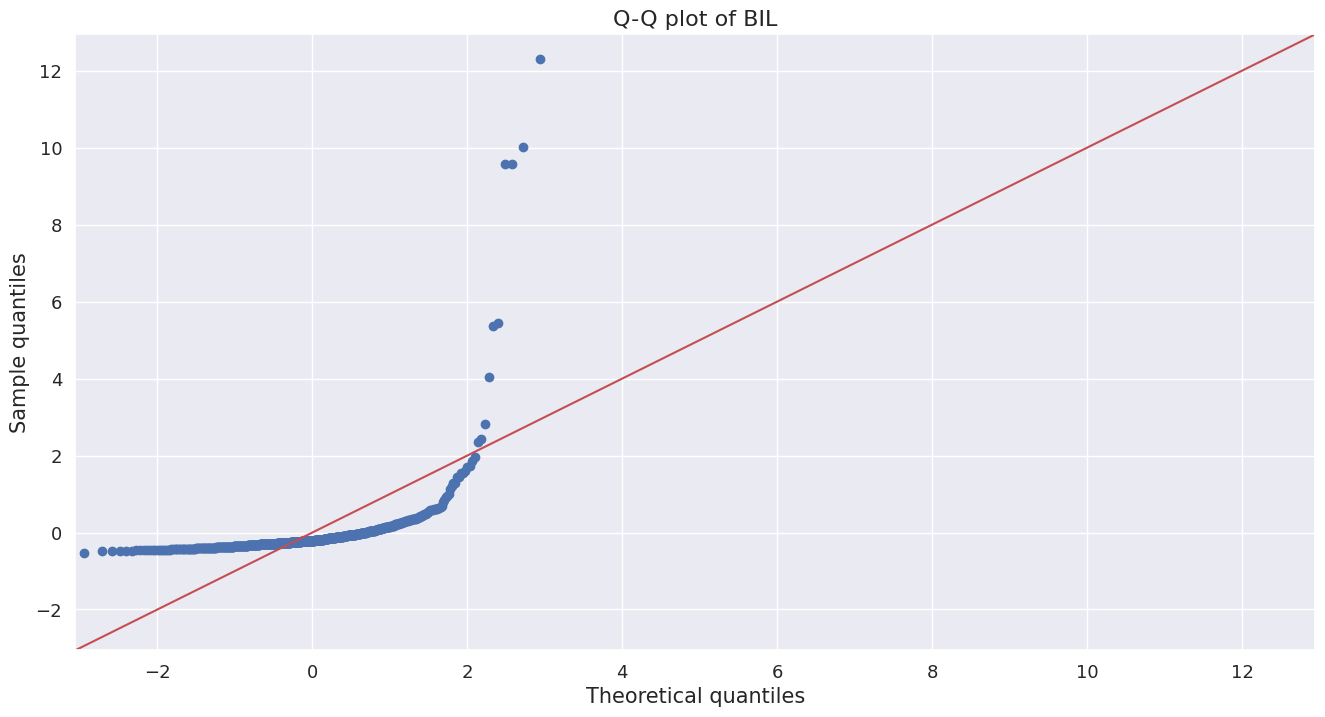

0       6.93
1      11.17
2       8.84
3       7.33
4       9.15
       ...  
606     5.57
607     1.54
608     1.66
609     3.56
610     9.07
Name: CHE, Length: 611, dtype: float64


<Figure size 800x500 with 0 Axes>

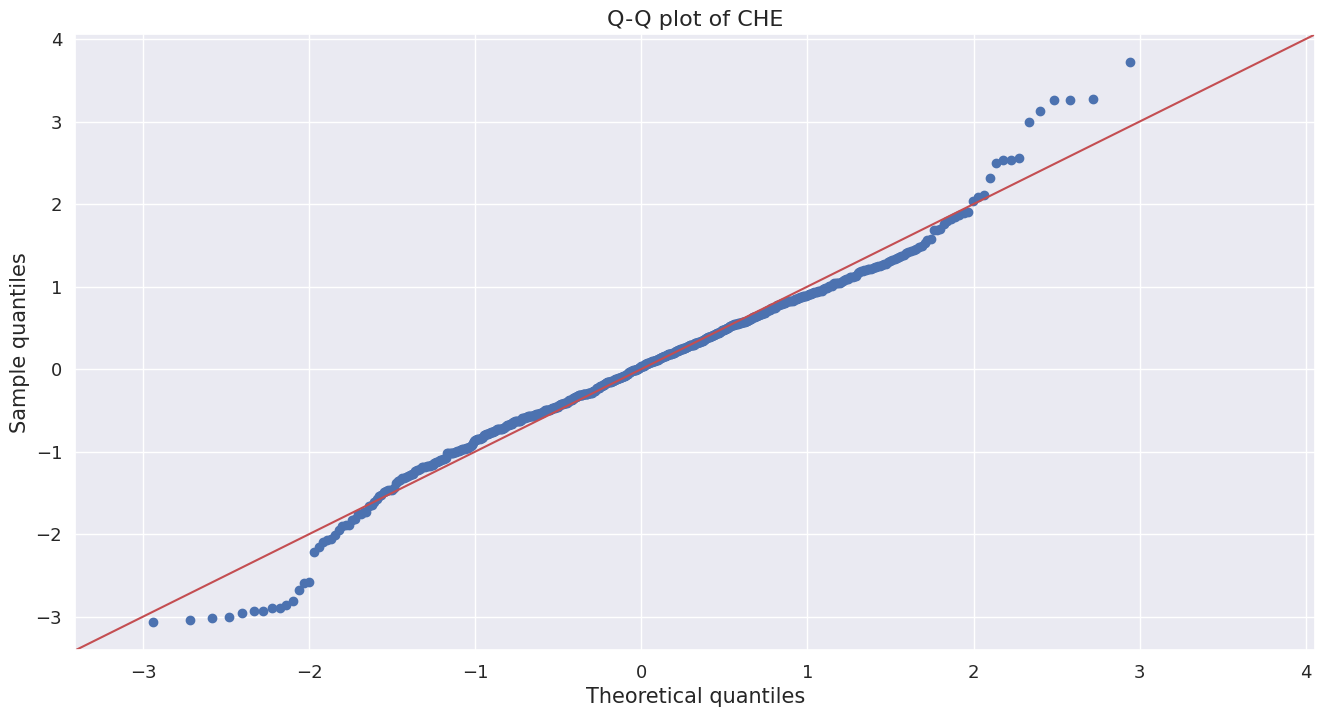

0      3.23
1      4.80
2      5.20
3      4.74
4      4.32
       ... 
606    6.30
607    3.02
608    3.63
609    4.20
610    5.30
Name: CHOL, Length: 611, dtype: float64


<Figure size 800x500 with 0 Axes>

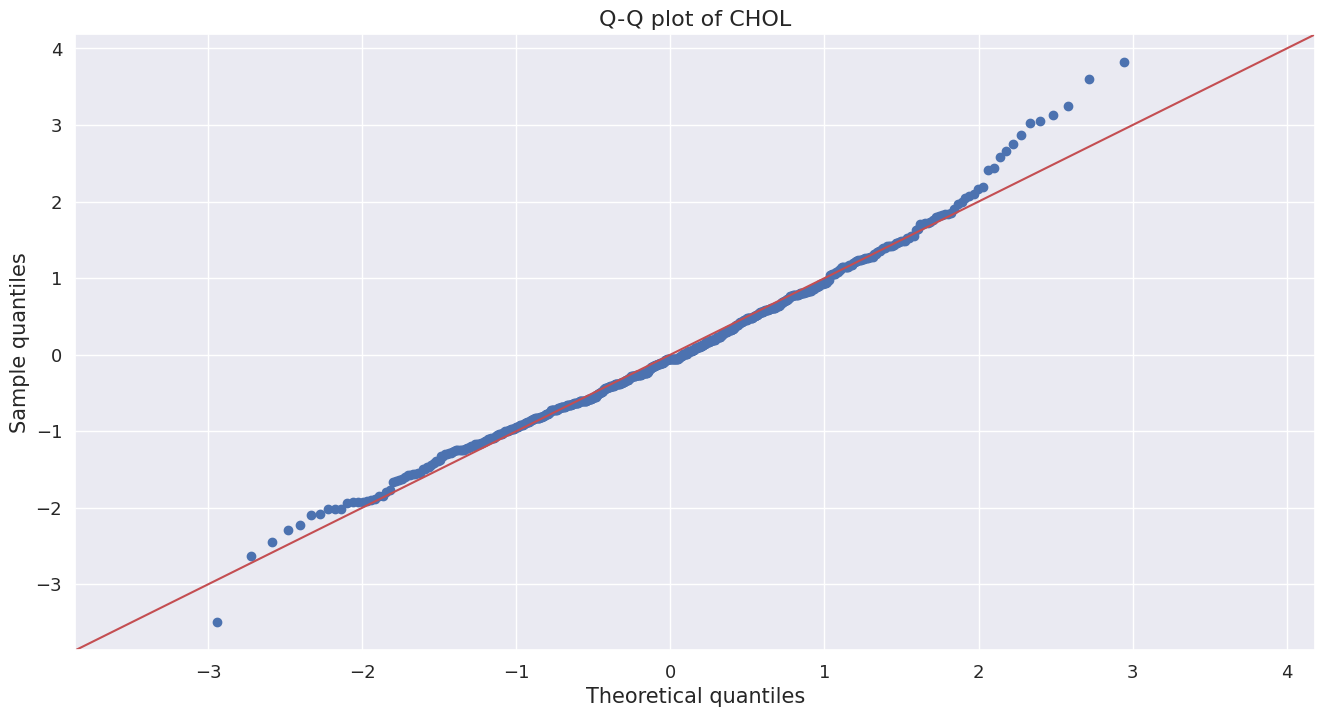

0      106.0
1       74.0
2       86.0
3       80.0
4       76.0
       ...  
606     55.7
607     63.0
608     66.7
609     52.0
610     67.0
Name: CREA, Length: 611, dtype: float64


<Figure size 800x500 with 0 Axes>

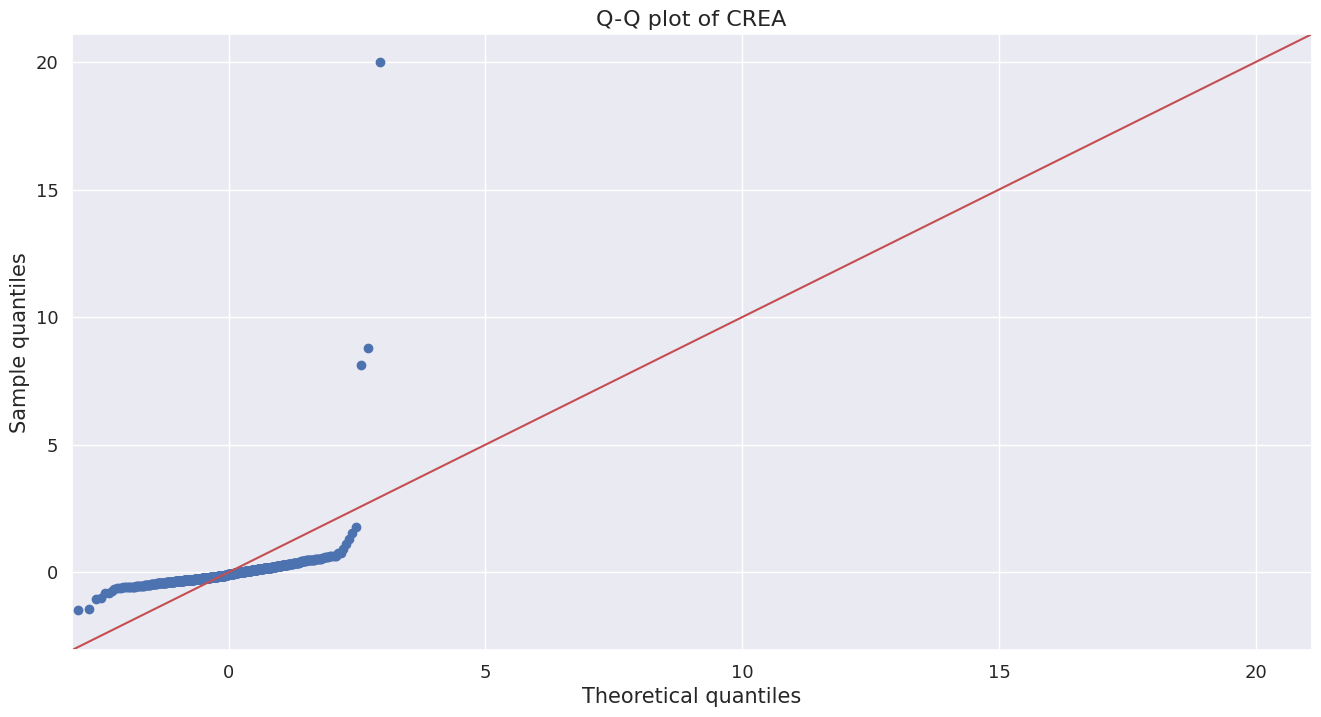

0       12.1
1       15.6
2       33.2
3       33.8
4       29.9
       ...  
606    650.9
607     35.9
608     64.2
609     50.0
610     34.0
Name: GGT, Length: 611, dtype: float64


<Figure size 800x500 with 0 Axes>

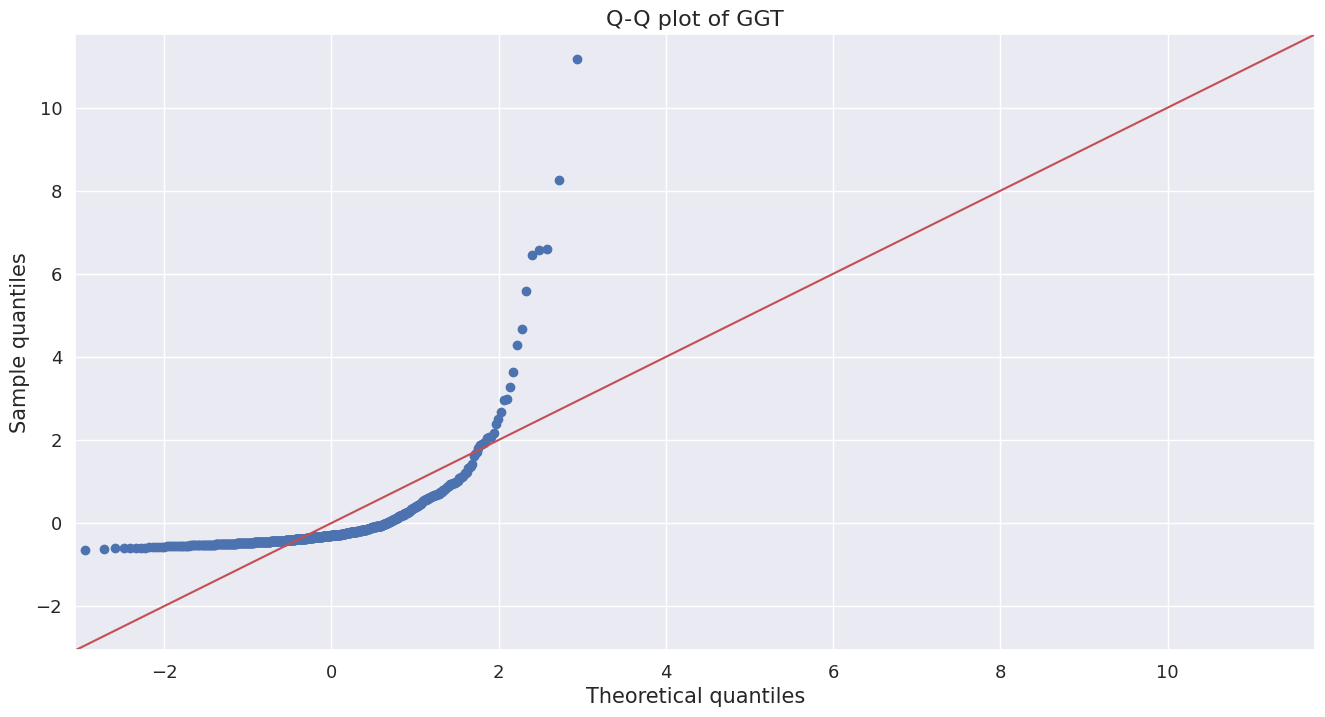

0      69.0
1      76.5
2      79.3
3      75.7
4      68.7
       ... 
606    68.5
607    71.3
608    82.0
609    71.0
610    68.0
Name: PROT, Length: 611, dtype: float64


<Figure size 800x500 with 0 Axes>

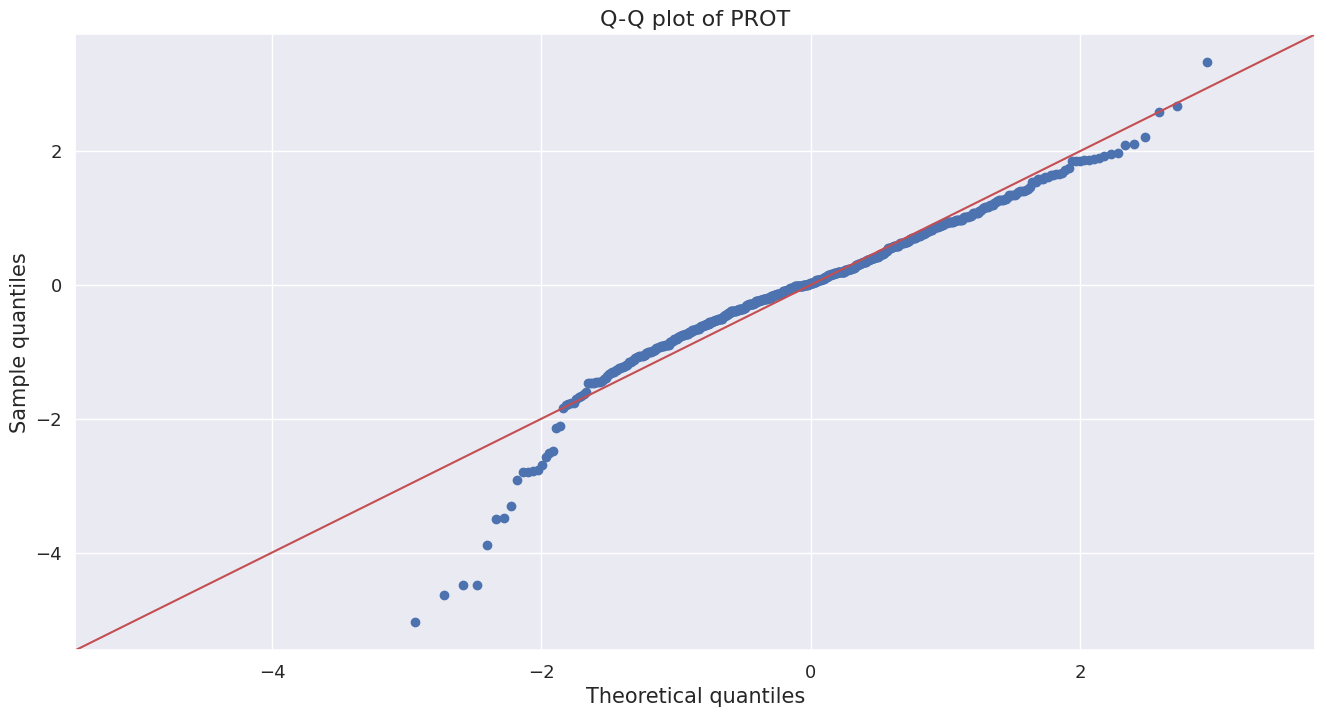

In [ ]:
# checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot

data_norm = df_pd[['Age',
 'ALB',
 'ALP',
 'ALT',
 'AST',
 'BIL',
 'CHE',
 'CHOL',
 'CREA',
 'GGT',
 'PROT']]

for c in data_norm.columns[:]:
  print(data_norm[c])
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

Text(0.5, 1.0, 'Gender')

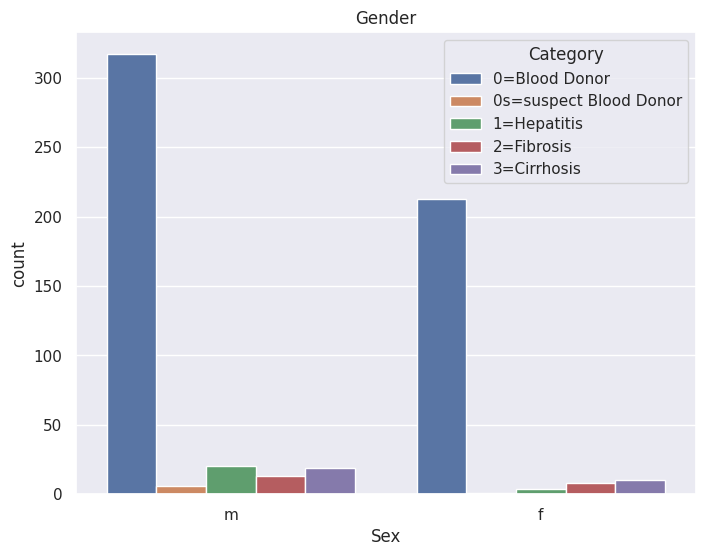

In [ ]:
#Analyzing Gender Specific Distribution
plt.figure(figsize=(8,6))
sns.countplot(x = "Sex", data = df_pd, hue = "Category")
plt.title("Gender",fontsize=12)



Univariate Analysis

categorical variables - count plot                         
numerical variables - distribution plot

In [ ]:
df_pd['Category'].value_counts()

0=Blood Donor             530
3=Cirrhosis                29
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64

From the countplot, we can see that we have class imbalances in our dataset ie. some classes have more examples than others. Therefore this could make it challenging to train our model and achieve the desired accuracy score. model would be baised towards Category of blood donor

In [ ]:
#assigning numeric values to categorical data
df_pd['Category'] = df_pd['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0,
                                     "1=Hepatitis" : 1, "2=Fibrosis" : 1, "3=Cirrhosis" : 1})

df_pd['Sex'] = df_pd['Sex'].map({'m': 1, 'f': 0})

In [ ]:
df_pd.head()

Category  Age  Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA   GGT  \
0         0   32    1  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0  12.1   
1         0   32    1  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0  15.6   
2         0   32    1  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0  33.2   
3         0   32    1  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0  33.8   
4         0   32    1  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0  29.9   

   PROT  
0  69.0  
1  76.5  
2  79.3  
3  75.7  
4  68.7

<Axes: >

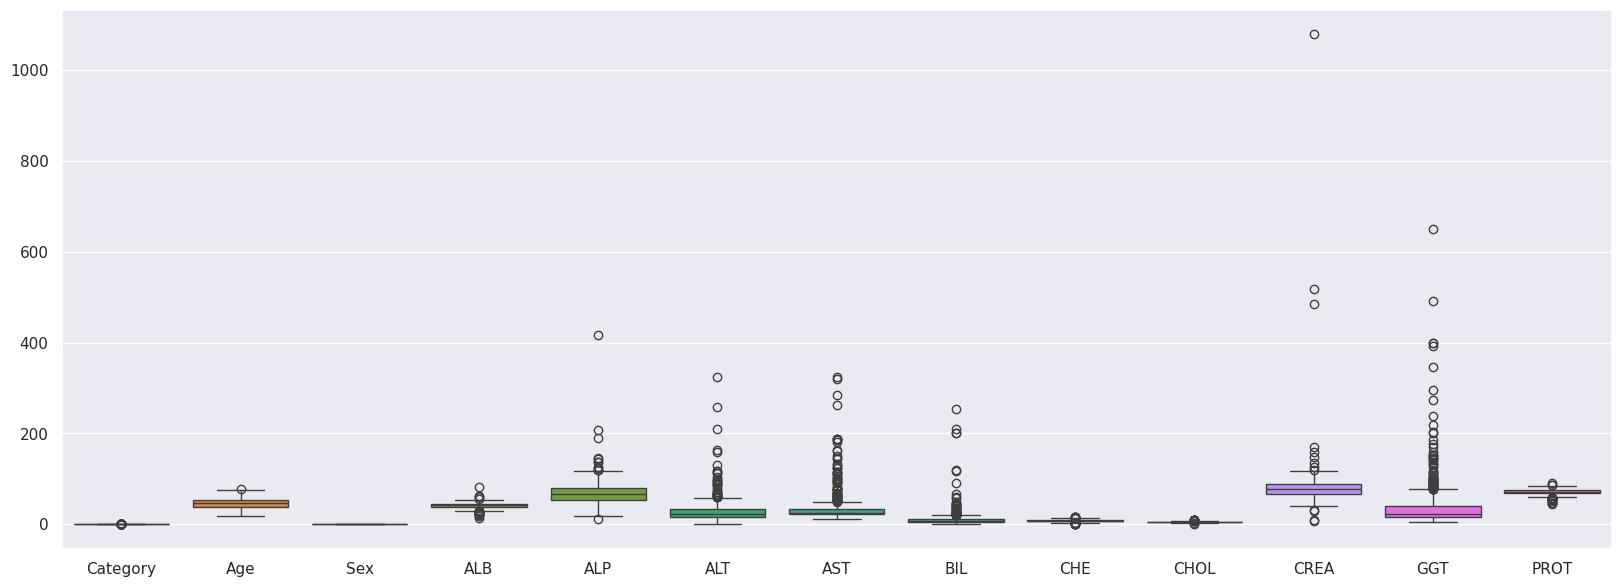

In [ ]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data=df_pd)

We observed from above plot the ranges of the feature values are the same, all the values are in the range of 100s

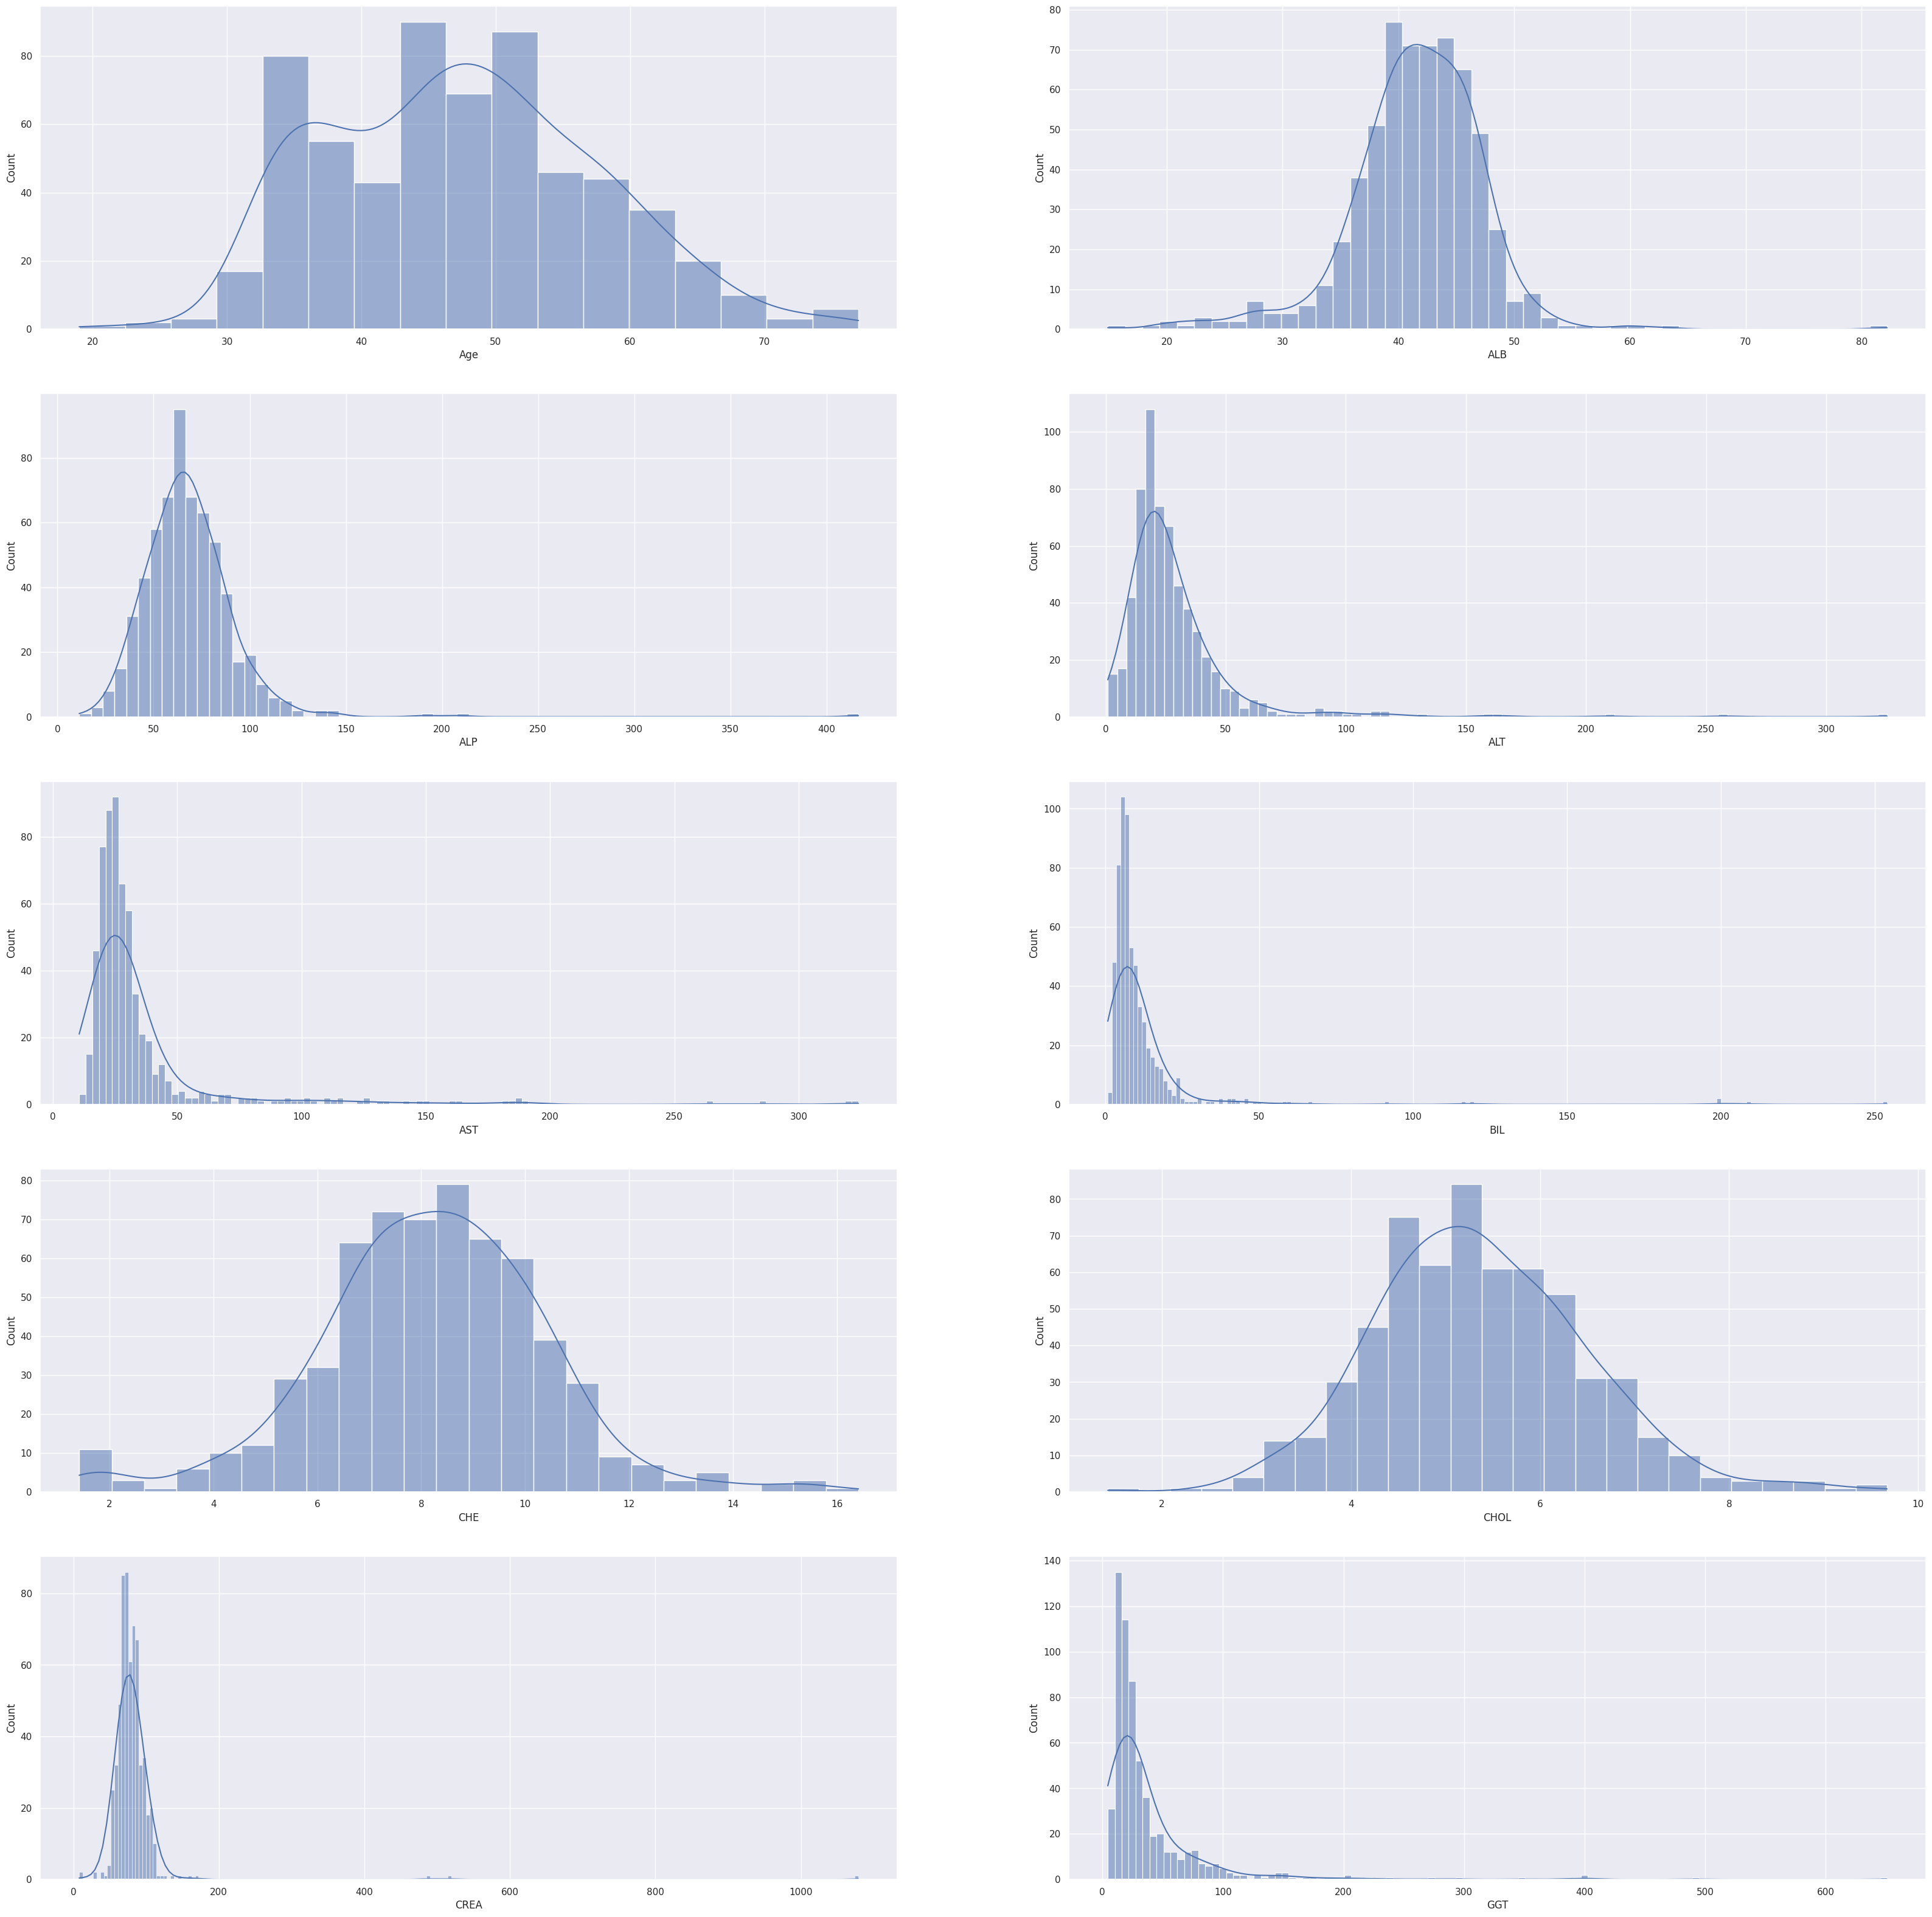

In [ ]:
# plotting distributions of numerical columns

column = ['Age',
 'ALB',
 'ALP',
 'ALT',
 'AST',
 'BIL',
 'CHE',
 'CHOL',
 'CREA',
 'GGT',
 'PROT']
fig , ax = plt.subplots(nrows = 5,ncols=2,figsize=(40,40))
i = 0
for rows in range(5):
    for columns in range(2):
        if(i >= len(column)):
            break
        sns.histplot(data=df_pd, x=column[i], ax = ax[rows,columns],kde=True)
        i = i + 1

#Inferences about the range of variables
1. Age: The Samples were taken from people ranged from 20 to 75
2. ALB: The distribution largely follows normal distribution with a mean of 45 units
3. ALP: The range varies from 10 to 150 with mean of around 70
4. ALT: The distribution varies from 0 to 300
5. AST: Varies from 20 to 200
6. BIL: The range varies from 0 to 50 and there are many outliers
7. CHE: Largely follows normal distribution in the range of 2 to 16  with a mean of around 9
8. CHOL: Largely follows normal distribution in the range of 2 to 10  with a mean close to 5
9. CREA: The range varies from 0 to 100 and has outliers
10. GGT: The range varies from 0 to 600


<Axes: xlabel='Sex', ylabel='Density'>

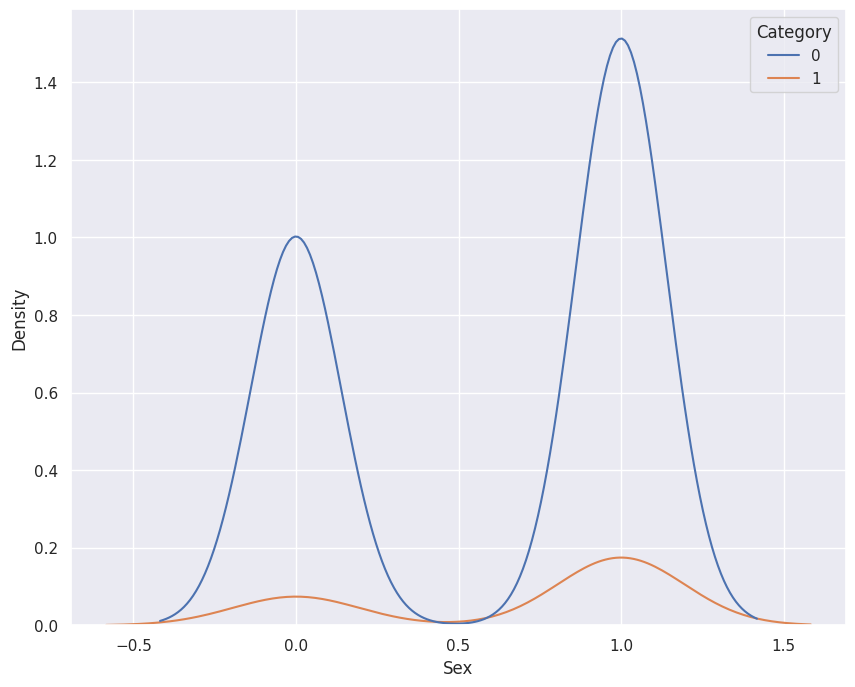

In [ ]:
# analyzing gender effect
plt.figure(figsize=(10,8))
sns.kdeplot(data=df_pd, x="Sex",hue="Category")

<Axes: xlabel='Age', ylabel='Density'>

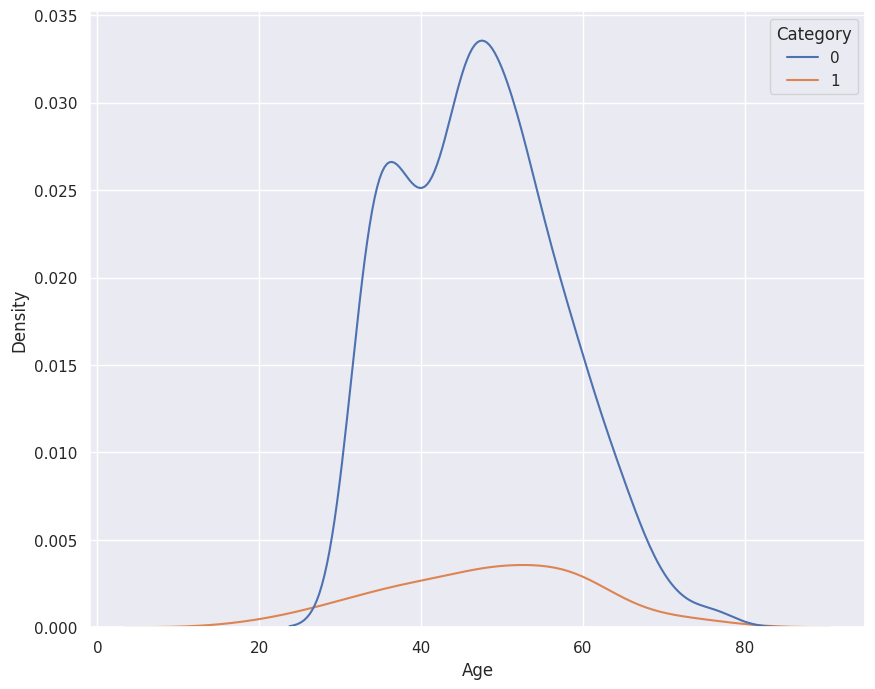

In [ ]:
# analyzing gender effect
plt.figure(figsize=(10,8))
sns.kdeplot(data=df_pd, x="Age",hue="Category")

We observe that both Age and Gender have no significant impact on Hepatits Diagnosis

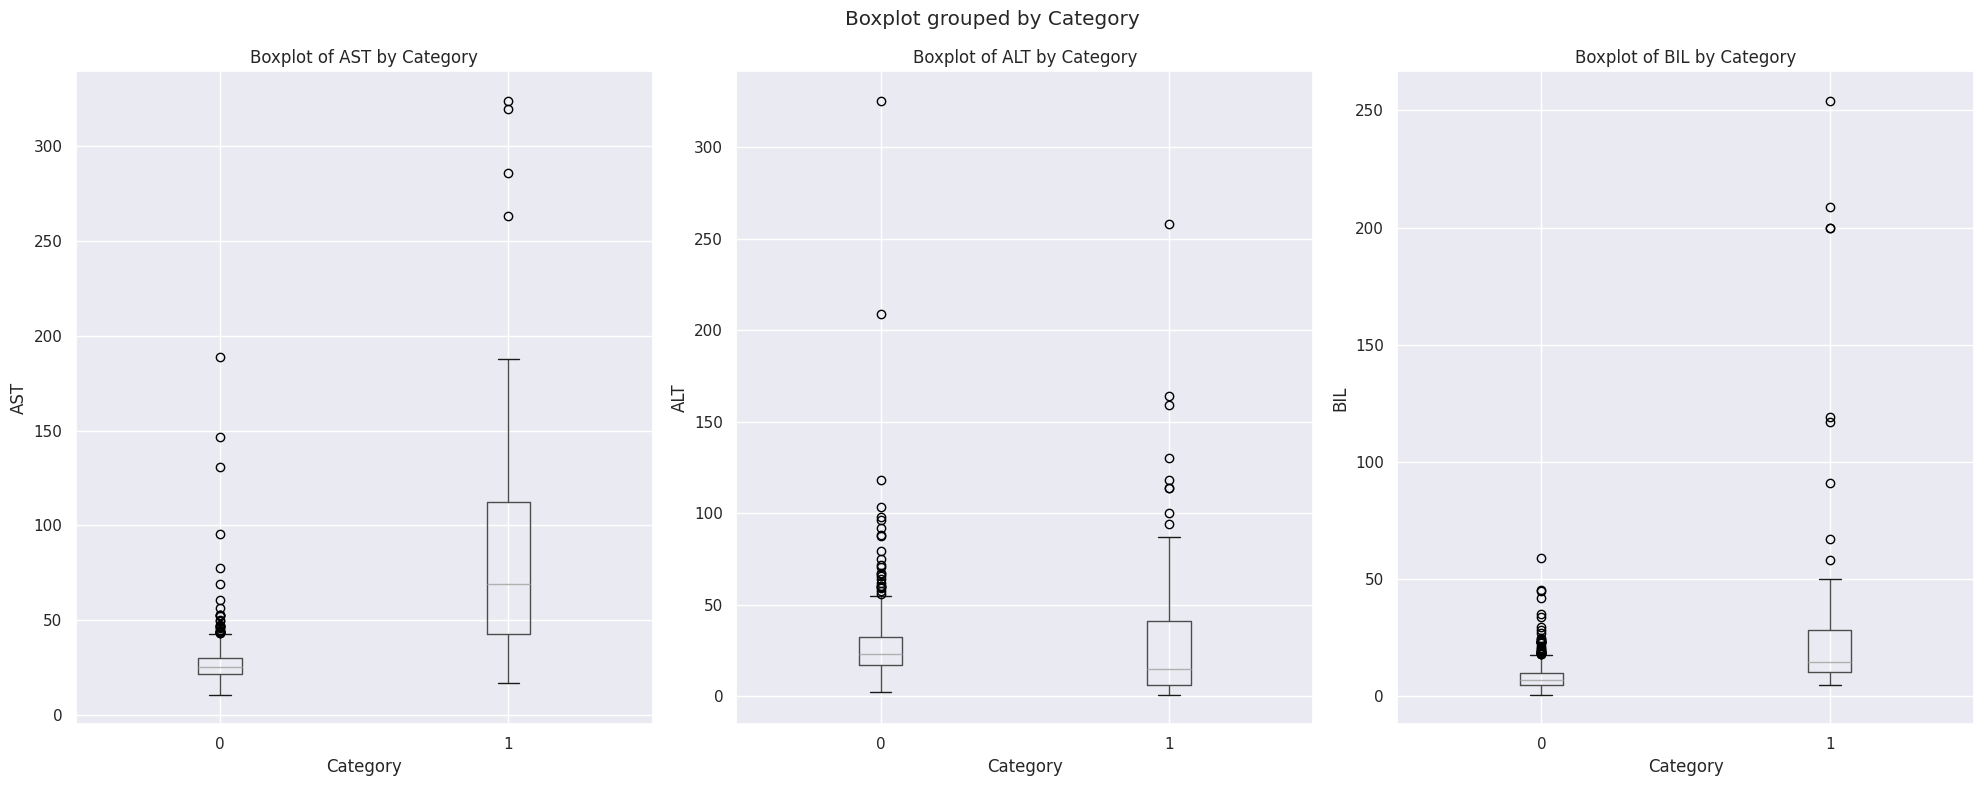

In [ ]:
col_to_plot = ['AST', 'ALT', 'BIL']
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
for i, col in enumerate(col_to_plot):
    df_pd.boxplot(column=col, by='Category', ax=ax[i])
    ax[i].set_title(f'Boxplot of {col} by Category')
    ax[i].set_ylabel(col)
    ax[i].set_xlabel('Category')

plt.tight_layout()
plt.show()






Many outliers appear to be present based off of these plots. A higher concentration of these outliers fall between 2 and 3 standard deviations from their respective means

In [ ]:
import plotly.express as px
from plotly.offline import init_notebook_mode

normalized_data = (df_pd[{ 'ALB',
 'ALP',
 'ALT',
 'AST',
 'BIL',
 'CHE',
 'CHOL',
 'CREA',
 'GGT',
 'PROT'}]-df_pd[{ 'ALB',
 'ALP',
 'ALT',
 'AST',
 'BIL',
 'CHE',
 'CHOL',
 'CREA',
 'GGT',
 'PROT'}].mean())/df_pd[{ 'ALB',
 'ALP',
 'ALT',
 'AST',
 'BIL',
 'CHE',
 'CHOL',
 'CREA',
 'GGT',
 'PROT'}].std()

px.box(
    data_frame= normalized_data.melt(),
    y= 'value',
    facet_col= 'variable',
    color= 'variable',
    notched= True,
    template= 'ggplot2',
    title= "Boxplots for Outlier Detection (Normalized)"

).for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1])).show()

We can observe that PROT, CHE and CHOL have little to no outliers

In [ ]:
px.histogram(
    data_frame= normalized_data.melt(),
    x= 'value',
    nbins= 30,
    facet_col= 'variable',
    color= 'variable',
    template= 'ggplot2',
    title= "Histograms for Outlier Detection (Normalized)"

).for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1])).show()

The results are represented in Histograms for better understanding

In [ ]:
px.histogram(
    normalized_data[normalized_data >3].melt(),
    x= 'value',
    facet_col= 'variable',
    color= 'variable',
    nbins= 1,
    template= 'ggplot2',
    title= "Number of Outliers with Z-score > 3"

).for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1])).show()

In [ ]:
#Dropping the outliers
df_pd[(normalized_data >3).any(1)].shape

(53, 13)

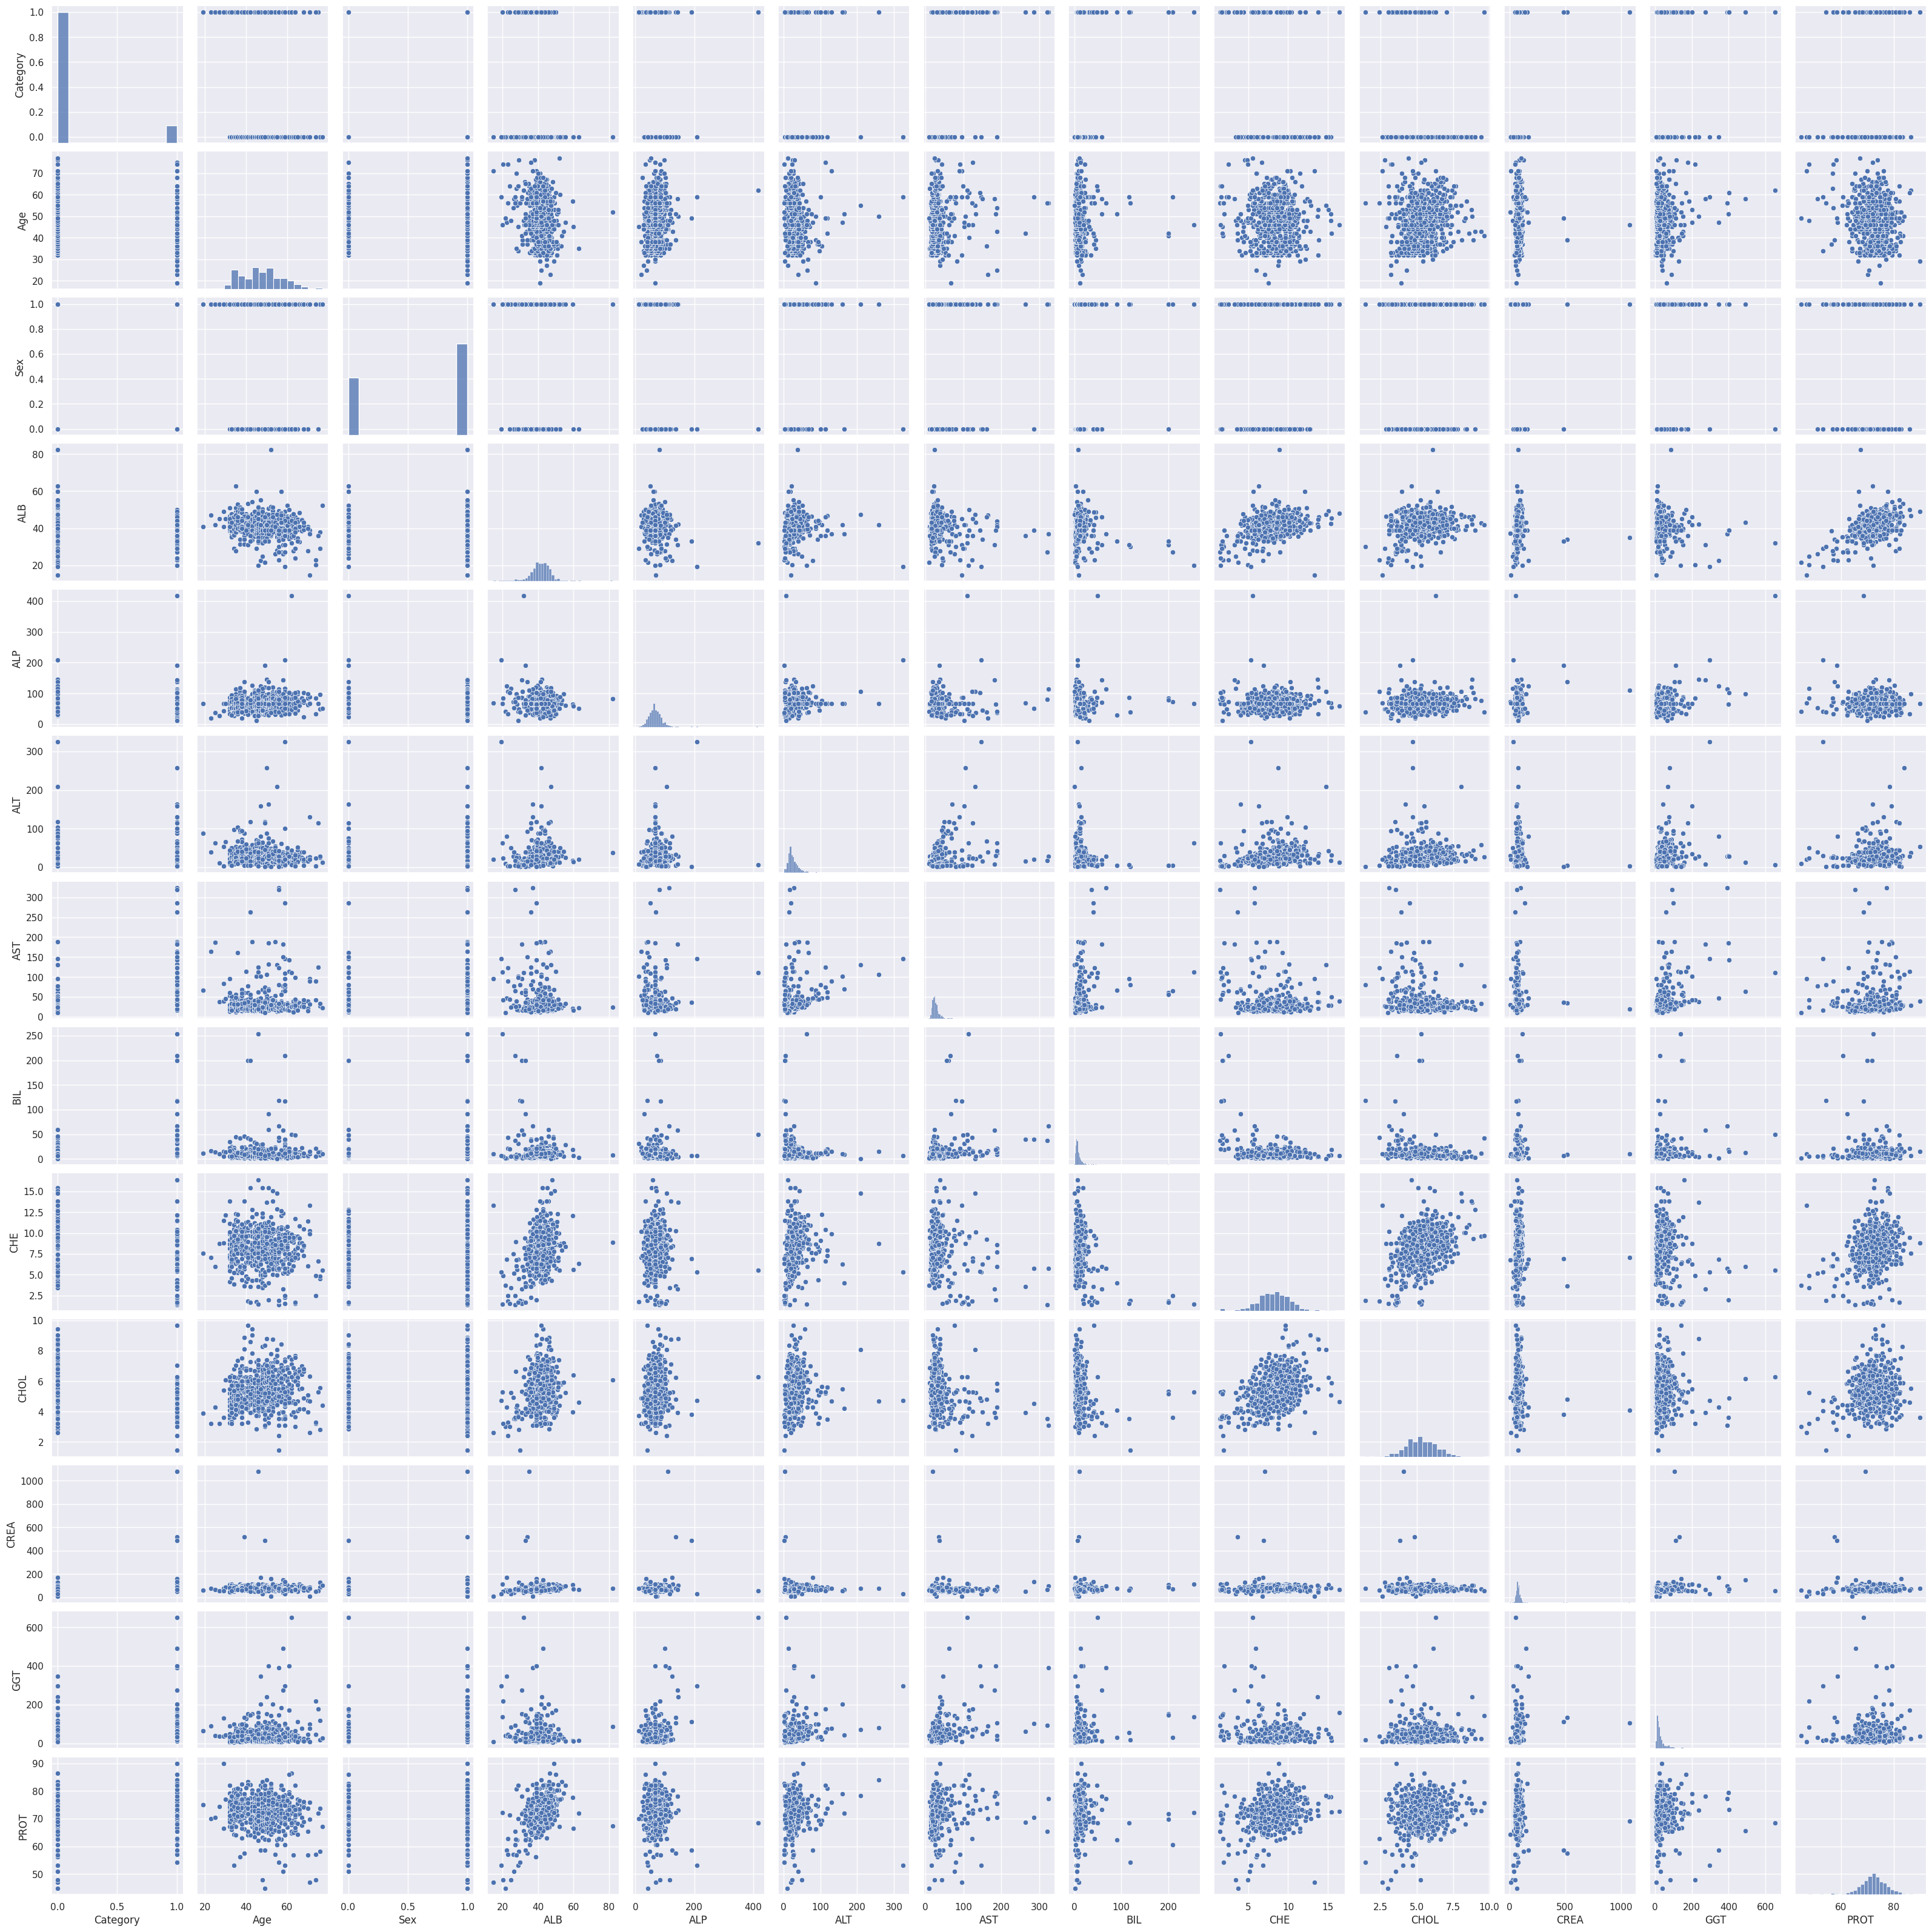

In [ ]:
# All attributes are plotted against each other to see the pattern of distribution
sns.pairplot(df_pd)

What are the data types? (Only numeric and categorical) This description represents the data types of variables in a dataset, indicating the presence of object (categorical), int64 (integer), and float64 (floating-point) variables.

Are there missing values? Yes, the missing values were imputed using the median. This imputation method, which replaces missing values with the median of the respective variables, was employed to maintain the central tendency of the data distribution and address gaps in the dataset.

What are the likely distributions of the numeric variables? The QQ-plot analysis indicates that numeric variables in the dataset adhere to a normal distribution. This visualization method provides a graphical comparison between the observed data quantiles and the expected quantiles of a normal distribution. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods) Selected Features (Correlation): ['Category', 'AST', 'GGT', 'BIL', 'CHOL', 'CHE', 'ALB', 'CREA'] Selected Features (Mutual Information): ['ALB', 'ALP', 'ALT', 'AST', 'BIL'] Selected Features (Random Forest Feature Importance): ['AST', 'ALT', 'BIL', 'ALP', 'GGT', 'PROT', 'Age', 'CHE', 'CHOL', 'CREA', 'ALB']

Which independent variables have missing data? How much? ALP(Alkaline phosphatase level)-17, ALT(Alanine transaminase level)-1, CHOL(Cholesterol level)-6, PROT(Total protein level)-1

Do the training and test sets have the same data? The model was trained using train data and tested on the separate data to learn the patterns and test set is not used during training. After training, the performance of the model was evalutated on the test data

In the predictor variables independent of all the other predictor variables? Contrary to independence, the variables in the dataset display interdependence, as evident from both the correlation table and the pairplot visualization. Multiple independent variables demonstrate significant correlations, suggesting potential multicollinearity among them. Which predictor variables are the most important? Based on Correlation, Mutual Information and Random Forest are AST, BIL and ALB

Do the ranges of the predictor variables make sense? 1) Few ALP values are higher and few ALTs are lower indicating the sample comes from a non-healthy blood donor 2)There are only 2 categories in sexes and males(61.4%) were almost twice more sampled than females(38.6%) 3) Most people seem to develop aliments when they are older 4) Total of Healthy People : 537 Total of Infected People : 74

What are the distributions of the predictor variables?
The data distribution is confirmed to adhere to a normal distribution, as indicated by the QQ-plot analysis. Additionally, a correlation between variables is observed, substantiated by the correlation table and pairplot visualization, underscoring the interdependence among the variables in the dataset.

#Feature Selection





In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

numerical_cols = [ 'ALP',
 'ALT',
 'AST',
 'BIL',
 'CHE',
 'CHOL',
 'CREA',
 'GGT',
 'PROT']

model = sm.OLS(df_pd['Category'], df_pd[numerical_cols]).fit()

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Category   R-squared (uncentered):                   0.590
Model:                            OLS   Adj. R-squared (uncentered):              0.583
Method:                 Least Squares   F-statistic:                              96.08
Date:                Wed, 03 Apr 2024   Prob (F-statistic):                   2.58e-110
Time:                        03:49:36   Log-Likelihood:                          49.999
No. Observations:                 611   AIC:                                     -82.00
Df Residuals:                     602   BIC:                                     -42.26
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ALP           -0.0029      0.000     -7.260      0.000      -0.004      -0.002
ALT           -0.0006      0.000     -1.516      0.130      -0.001       0.000
AST            0.0041      0.000     11.873      0.000       0.003       0.005
BIL            0.0032      0.001      6.186      0.000       0.002       0.004
CHE           -0.0006      0.005     -0.131      0.896      -0.010       0.009
CHOL          -0.0392      0.009     -4.322      0.000      -0.057      -0.021
CREA           0.0009      0.000      4.602      0.000       0.000       0.001
GGT            0.0017      0.000      7.684      0.000       0.001       0.002
PROT           0.0033      0.001      3.981      0.000       0.002       0.005
==============================================================================
Omnibus:                      239.367   Durbin-Watson:                   0.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1106.551
Skew:                           1.730   Prob(JB):                    5.19e-241
Kurtosis:                       8.612   Cond. No.                         152.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Model Coefficients:

ALP, AST, BIL, CHOL, CREA, GGT, and PROT have statistically significant coefficients based on their p-values.
ALT and CHE do not appear to have statistically significant coefficients.
#Skew and Kurtosis:

The skewness value of 1.730 indicates a right-skewed distribution.
The kurtosis value of 8.612 indicates heavy tails and potential outliers.
Durbin-Watson:

#The Durbin-Watson
The Durbin-Watson statistic of 0.853 suggests positive autocorrelation, indicating that consecutive errors in the regression model are positively correlated.

#Jarque-Bera Test:
The Jarque-Bera test rejects the null hypothesis of normality, indicating that the residuals may not follow a normal distribution.

Overall, while many coefficients are statistically significant, the presence of autocorrelation and deviations from normality in the residuals should be considered when interpreting the regression model results. Additional diagnostics and transformations may be necessary to address these issues and improve the model's performance.

#Model Coefficients

In [ ]:
# Assume 'target_variable' is your dependent variable
target_variable = 'Category'

# Separate independent variables (features) and the target variable
X = df_pd.drop(target_variable, axis=1)
y = df_pd[target_variable]

# Method 1: Correlation
correlation_matrix = df_pd.corr()
correlation_with_target = correlation_matrix[target_variable].abs().sort_values(ascending=False)
selected_features_corr = correlation_with_target[correlation_with_target > 0.1].index.tolist()

# Method 2: Mutual Information
selector_mi = SelectKBest(score_func=mutual_info_regression, k='all')
selector_mi.fit(X, y)
selected_features_mi = X.columns[selector_mi.scores_ > 0.1].tolist()

# Method 3: Feature Importance using Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
selected_features_rf = feature_importances[feature_importances > 0.01].index.tolist()

# Print selected features from each method
print("Selected Features (Correlation):", selected_features_corr)
print("Selected Features (Mutual Information):", selected_features_mi)
print("Selected Features (Random Forest Feature Importance):", selected_features_rf)

Selected Features (Correlation): ['Category', 'AST', 'GGT', 'BIL', 'CHOL', 'CHE', 'ALB', 'CREA']
Selected Features (Mutual Information): ['ALB', 'ALP', 'ALT', 'AST', 'BIL']
Selected Features (Random Forest Feature Importance): ['AST', 'ALT', 'BIL', 'ALP', 'GGT', 'PROT', 'Age', 'CHE', 'CHOL', 'CREA', 'ALB']


In [ ]:
#Prepping data to build model
x = df_pd.drop('Category' , axis = 1)
x.head()

Age  Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA   GGT  PROT
0   32    1  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0  12.1  69.0
1   32    1  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0  15.6  76.5
2   32    1  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0  33.2  79.3
3   32    1  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0  33.8  75.7
4   32    1  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0  29.9  68.7

In [ ]:
y = df_pd['Category']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Category, dtype: int64

In [ ]:
# Spliting data into Training 67%, and Test set 33%

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [ ]:
# A LOGISTICAL REGRESSION MODEL
#from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

y_pred_lr = lr_model.predict(x_test)
score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 94.06 %


Feature: Age, Score: -0.03793
Feature: Sex, Score: -0.43209
Feature: ALB, Score: -0.13991
Feature: ALP, Score: -0.10071
Feature: ALT, Score: 0.01101
Feature: AST, Score: 0.04721
Feature: BIL, Score: 0.07941
Feature: CHE, Score: 0.19823
Feature: CHOL, Score: -0.97874
Feature: CREA, Score: 0.03443
Feature: GGT, Score: 0.03420
Feature: PROT, Score: 0.10067


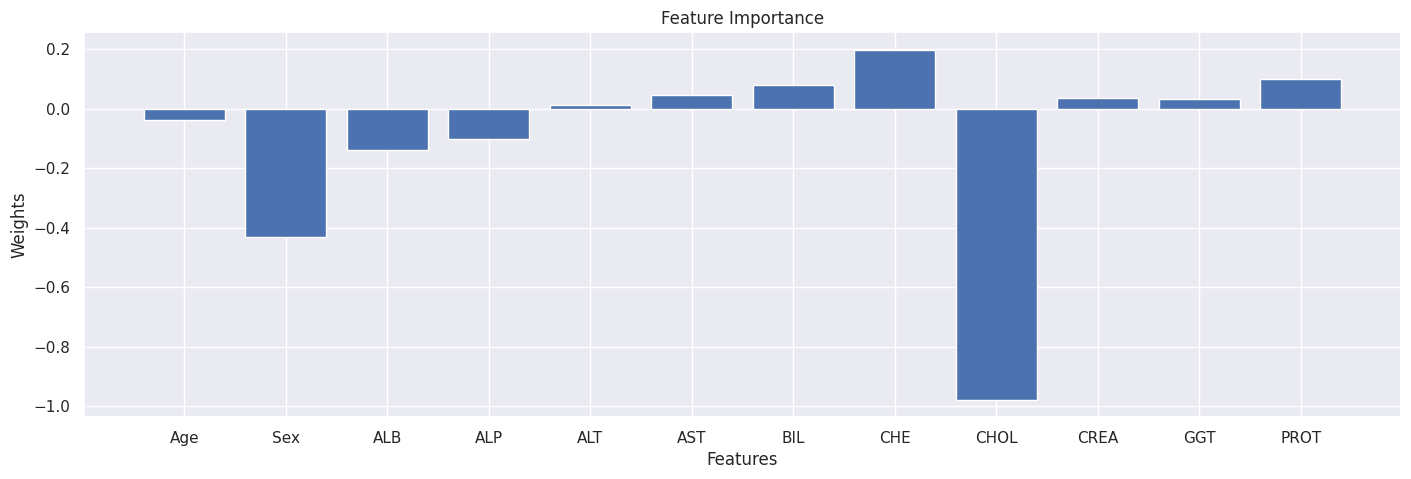

In [ ]:
# plot feature importance

features_list = x_train.columns.tolist()
# get importance
importance = lr_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %s, Score: %.5f' % (features_list[i],v))

# setting figure size by using figure() function
plt.figure(figsize = (17, 5))

# making the bar chart on the data
plt.bar(features_list, importance)

# giving title to the plot
plt.title("Feature Importance")

# giving X and Y labels
plt.xlabel("Features")
plt.ylabel("Weights")

# visualizing the plot
plt.show()



- **Age**: Score of -0.03793 suggests a slight negative impact on the outcome being analyzed. However, the magnitude of this impact is relatively small compared to other features.
  
- **Sex**: Score of -0.43209 indicates a significant negative impact. This suggests that the 'Sex' feature has a strong influence on the outcome, with a negative correlation.

- **ALB (Albumin)**: Score of -0.13991 suggests a moderate negative impact on the outcome. While not as influential as 'Sex', 'ALB' still contributes negatively to the outcome.

- **ALP (Alkaline Phosphatase)**: Score of -0.10071 implies a moderate negative impact. Similar to 'ALB', 'ALP' also contributes negatively to the outcome but to a lesser extent.

- **ALT (Alanine Aminotransferase)**: Score of 0.01101 suggests a very small positive impact, almost negligible. This feature may have minimal influence on the outcome.

- **AST (Aspartate Aminotransferase)**: Score of 0.04721 indicates a moderate positive impact. 'AST' contributes positively to the outcome, but not as strongly as some other features.

- **BIL (Bilirubin)**: Score of 0.07941 suggests a moderate positive impact. 'BIL' has a noticeable positive influence on the outcome.

- **CHE (Cholinesterase)**: Score of 0.19823 indicates a significant positive impact. This feature has a strong positive correlation with the outcome.

- **CHOL (Cholesterol)**: Score of -0.97874 suggests an extremely strong negative impact. 'CHOL' has the strongest negative correlation among all features.

- **CREA (Creatinine)**: Score of 0.03443 implies a small positive impact, although not as significant as some other features.

- **GGT (Gamma-Glutamyl Transferase)**: Score of 0.03420 suggests a small positive impact, similar to 'CREA'.

- **PROT (Protein)**: Score of 0.10067 indicates a moderate positive impact. 'PROT' contributes positively to the outcome, but not as strongly as 'CHE' or 'BIL'.

In summary, based on the provided scores:
- Features like 'Sex', 'CHE', 'BIL', and 'PROT' have notable impacts on the outcome.
- 'CHOL' stands out with an extremely strong negative impact.
- 'ALT', 'ALP', 'Age', 'AST', 'CREA', and 'GGT' have relatively smaller impacts on the outcome compared to other features.

In [ ]:
# A SVM MODEL
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(x_train,y_train)

y_pred_svm = svm_model.predict(x_test)
score_svm = round(accuracy_score(y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_svm)+" %")

The accuracy score achieved using Naive Bayes is: 94.06 %


In [ ]:
# K Nearest Neighbors Model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_knn)+" %")

The accuracy score achieved using Naive Bayes is: 93.07 %


In [ ]:
# Make predictions using the training set
from sklearn.metrics import r2_score, mean_squared_error

y_pred = knn.predict(x_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on training set =',r2)

Mean squared error: 0.05
Coefficient of determination: 0.45
R^2 score on training set = 0.4506715506715506


In [ ]:
# Make predictions using the testing set
y_pred = knn.predict(x_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.07
Coefficient of determination: 0.44
R^2 score on test set = 0.4363165238190154


In [ ]:
scores = [score_lr,score_svm,score_knn]
algorithms = ["Logistic Regression","Support Vector Machine","K-Nearest Neighbors"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 94.06 %
The accuracy score achieved using Support Vector Machine is: 94.06 %
The accuracy score achieved using K-Nearest Neighbors is: 93.07 %


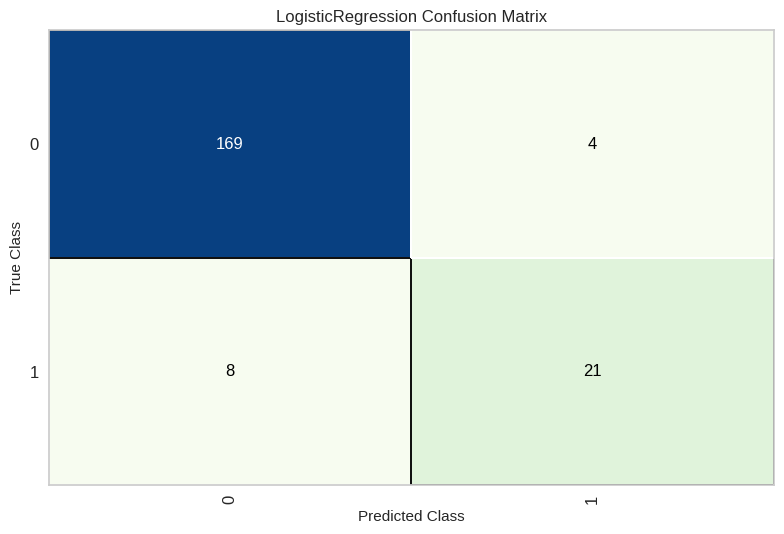

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
# Plot the confusion matrix.
from yellowbrick.classifier import ConfusionMatrix

lr_cm = ConfusionMatrix(lr_model, cmap='GnBu')

lr_cm.fit(x_train, y_train)
lr_cm.score(x_test, y_test)
lr_cm.show()



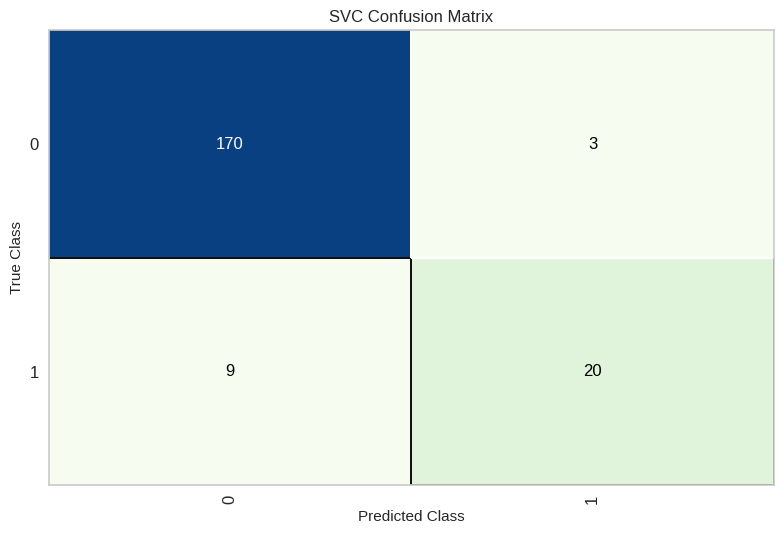

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
# Plot the confusion matrix.
from yellowbrick.classifier import ConfusionMatrix

svm_cm = ConfusionMatrix(svm_model, cmap='GnBu')

svm_cm.fit(x_train, y_train)
svm_cm.score(x_test, y_test)
svm_cm.show()

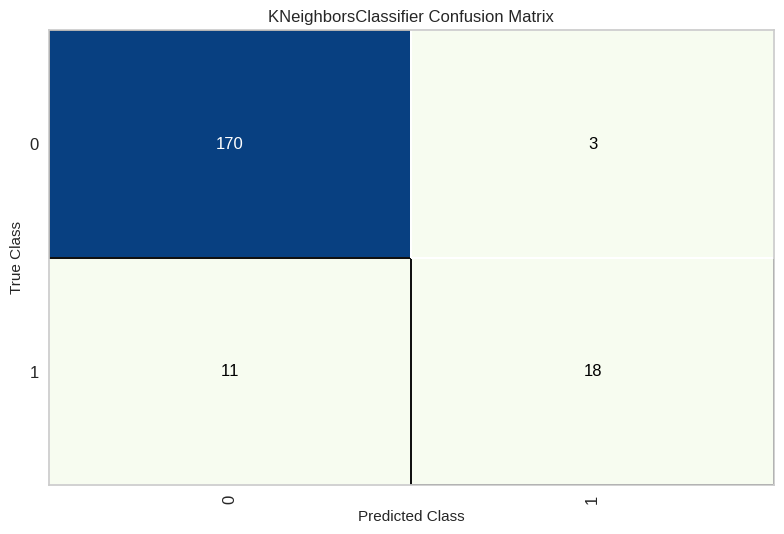

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
# Plot the confusion matrix.
from yellowbrick.classifier import ConfusionMatrix

knn_cm = ConfusionMatrix(knn, cmap='GnBu')

knn_cm.fit(x_train, y_train)
knn_cm.score(x_test, y_test)
knn_cm.show()

In [ ]:
# accuracy, precision & recall report
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.classifier import ClassPredictionError

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       173
           1       0.84      0.72      0.78        29

    accuracy                           0.94       202
   macro avg       0.90      0.85      0.87       202
weighted avg       0.94      0.94      0.94       202



In [ ]:
# accuracy, precision & recall report
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.classifier import ClassPredictionError

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       173
           1       0.87      0.69      0.77        29

    accuracy                           0.94       202
   macro avg       0.91      0.84      0.87       202
weighted avg       0.94      0.94      0.94       202



In [ ]:
# accuracy, precision & recall report
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.classifier import ClassPredictionError

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       173
           1       0.86      0.62      0.72        29

    accuracy                           0.93       202
   macro avg       0.90      0.80      0.84       202
weighted avg       0.93      0.93      0.93       202



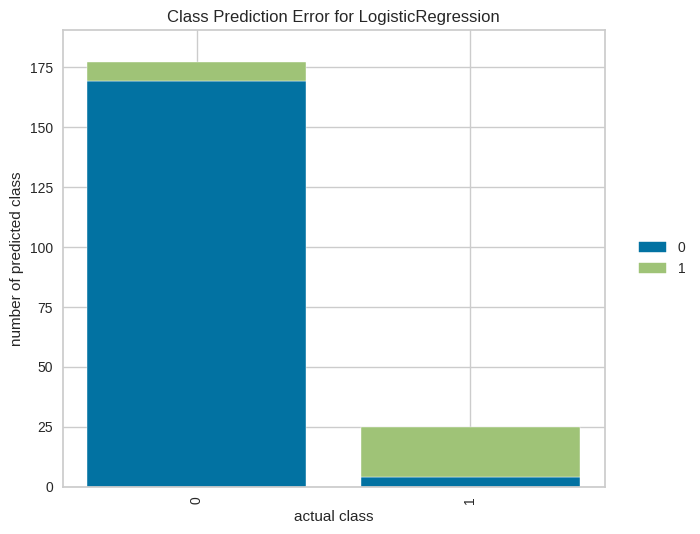

<Axes: title={'center': 'Class Prediction Error for LogisticRegression'}, xlabel='actual class', ylabel='number of predicted class'>

In [ ]:
visualizer = ClassPredictionError(lr_model)

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

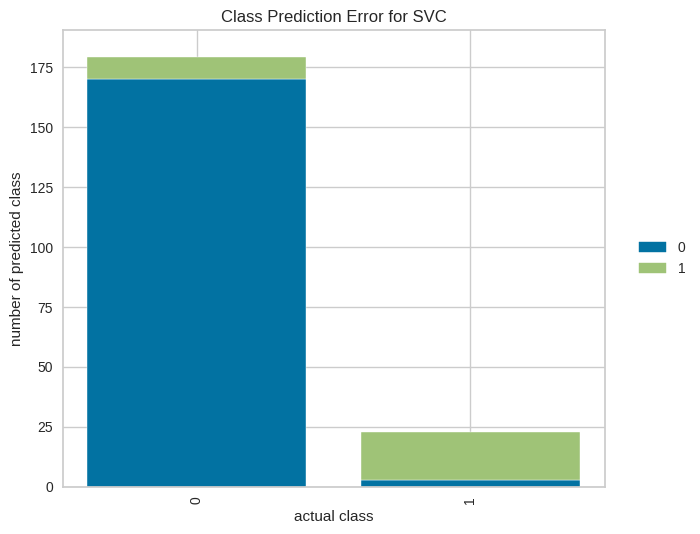

<Axes: title={'center': 'Class Prediction Error for SVC'}, xlabel='actual class', ylabel='number of predicted class'>

In [ ]:
visualizer = ClassPredictionError(svm_model)


visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

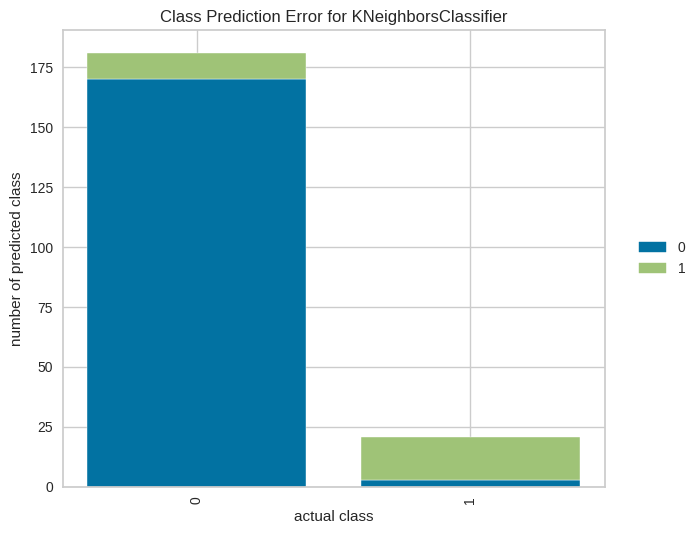

<Axes: title={'center': 'Class Prediction Error for KNeighborsClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [ ]:
visualizer = ClassPredictionError(knn)

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

#Selecting the final model
Among the three models - Logistic Regression, SVM, and k-NN - Logistic Regression emerges as the most effective for this binary classification task, particularly when considering class 1's performance metrics. Both Logistic Regression and SVM showcase comparable precision, recall, and F1-score values for class 1, with SVM slightly edging in precision but trailing in recall. Meanwhile, k-NN exhibits lower performance metrics across the board, indicating its relative inefficacy compared to the other two models. Notably, Logistic Regression's superior F1-score for class 1 reinforces its standing as the top-performing model in this context, highlighting its capability in achieving a balanced precision-recall trade-off.

While Logistic Regression demonstrates its prowess in achieving high accuracy and balanced class-wise metrics, the choice of the best model should also consider other crucial factors. These factors include computational complexity, scalability, interpretability, and suitability for the specific dataset and problem domain. Therefore, while Logistic Regression stands out as the preferred choice based on its performance metrics, a comprehensive evaluation incorporating these additional considerations would provide a more holistic and informed decision regarding model selection.

In [ ]:
#Understanding the important features
import eli5
from eli5.sklearn import PermutationImportance

from mlxtend.evaluate import bias_variance_decomp

perm = PermutationImportance(knn, random_state=1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

AST (Aspartate Aminotransferase): The weight is 0.0812, with a standard deviation of 0.0311. This suggests that AST has a positive impact on the outcome, and the model is relatively confident about this impact.

GGT (Gamma-Glutamyl Transferase): The weight is 0.0307, with a standard deviation of 0.0170. GGT also has a positive impact, but with slightly less certainty compared to AST.

ALP (Alkaline Phosphatase): The weight is 0.0139, with a standard deviation of 0.0074. ALP has a positive impact, and the model is relatively confident about this impact.

ALT (Alanine Aminotransferase): The weight is 0.0079, with a standard deviation of 0.0101. ALT has a positive impact, but there is more uncertainty associated with this estimate compared to other features.

BIL (Bilirubin): The weight is 0.0050, with a standard deviation of 0.0063. BIL also has a positive impact, but there is some variability or uncertainty in this estimate.

PROT (Protein) and CREA (Creatinine): Both have weights of 0.0010 with standard deviations of 0.0040. They have positive impacts, but the model is less certain about their exact impact.

CHOL (Cholesterol), Sex, and Age: These features have weights close to zero, indicating that the model does not consider them highly impactful for predicting the outcome.

CHE (Cholinesterase) and ALB (Albumin): These features have negative weights (-0.0010), indicating a negative impact on the outcome. However, the model is not highly confident about these estimates due to the standard deviation of 0.0040.

#Tree model


In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(max_depth=3, random_state=1234)
DTree.fit(x_train,y_train)

DTree_score = DTree.score(x_test, y_test)
print(DTree_score)

0.6025358455806471


In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error
def model_sel(model):
    y_pred = model.predict(x_test)
    print("MODEL EVALUATION")
    print("\nr2_score of the model: ")
    print(r2_score(y_test,y_pred))

In [ ]:
# Model Evaluation on DecisionTreeRegressor
print("DECISION TREE REGRESSION: ")
print("-x"*25)
model_sel(DTree)

DECISION TREE REGRESSION: 
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x
MODEL EVALUATION

r2_score of the model: 
0.6025358455806471


In [ ]:
prediction_tree = DTree.predict(x_test)#Checking accuracy of predictions
print('Decision tree')
print('MAE: %f'% mean_absolute_error(y_test, prediction_tree))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, prediction_tree)))
print('R2 %f' % r2_score(y_test, prediction_tree))

Decision tree
MAE: 0.065023
RMSE: 0.221065
R2 0.602536


In [ ]:
# separating numerical features & categorical data to train & predict
features = df_pd.drop(['Category'], axis = 1)
target = df_pd['Category']

[Text(0.5416666666666666, 0.875, 'AST <= 53.05\nsquared_error = 0.098\nsamples = 409\nvalue = 0.11'),
 Text(0.3333333333333333, 0.625, 'ALT <= 7.7\nsquared_error = 0.038\nsamples = 374\nvalue = 0.04'),
 Text(0.16666666666666666, 0.375, 'ALB <= 46.1\nsquared_error = 0.188\nsamples = 8\nvalue = 0.75'),
 Text(0.08333333333333333, 0.125, 'squared_error = 0.0\nsamples = 6\nvalue = 1.0'),
 Text(0.25, 0.125, 'squared_error = 0.0\nsamples = 2\nvalue = 0.0'),
 Text(0.5, 0.375, 'Age <= 31.0\nsquared_error = 0.024\nsamples = 366\nvalue = 0.025'),
 Text(0.4166666666666667, 0.125, 'squared_error = 0.0\nsamples = 2\nvalue = 1.0'),
 Text(0.5833333333333334, 0.125, 'squared_error = 0.019\nsamples = 364\nvalue = 0.019'),
 Text(0.75, 0.625, 'PROT <= 53.65\nsquared_error = 0.122\nsamples = 35\nvalue = 0.857'),
 Text(0.6666666666666666, 0.375, 'squared_error = 0.0\nsamples = 3\nvalue = 0.0'),
 Text(0.8333333333333334, 0.375, 'GGT <= 25.0\nsquared_error = 0.059\nsamples = 32\nvalue = 0.938'),
 Text(0.75, 0

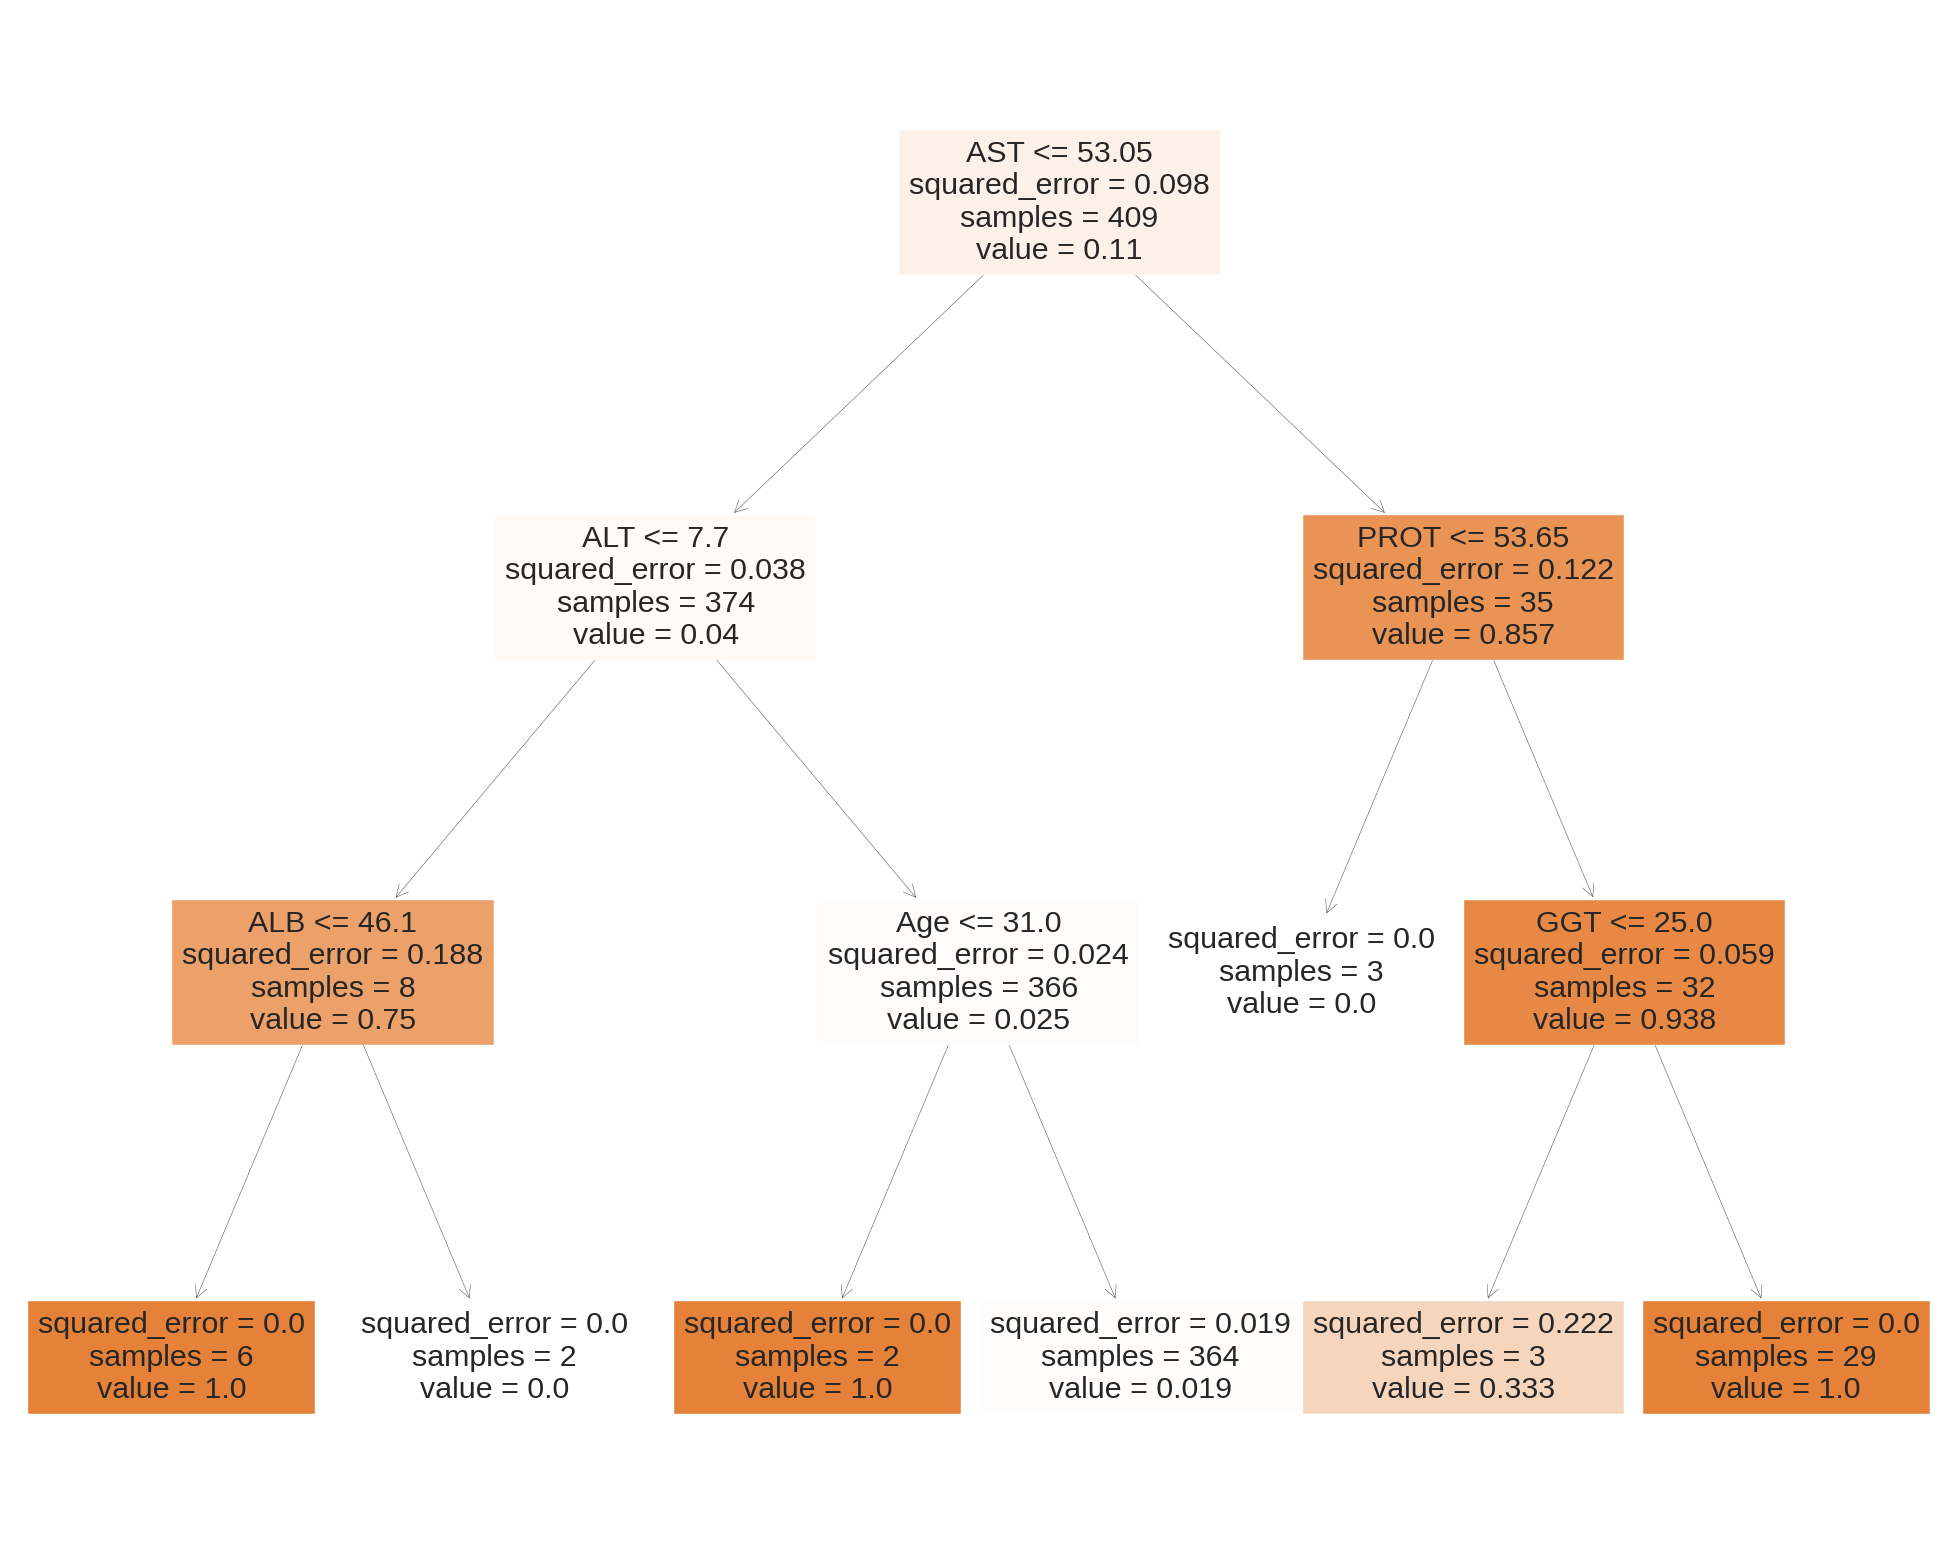

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))

tree.plot_tree(DTree, feature_names= features.columns, filled=True)

#Interpretation
Node Condition: AST <= 53 serves as a splitting criterion. When the AST value of a data point is 53 or lower, the decision tree follows one branch, and if it's higher than 53, it follows another branch.

Squared Error: The squared error quantifies how well the predicted values at this node align with the actual values. A lower squared error indicates better predictive performance.

Samples: The 409 samples meeting the AST condition are the subset of data that reaches this particular node during the decision-making process of the tree.

Value: The predicted outcome value of 0.11 represents the average or majority class of the target variable among the 409 samples at this node. It gives an insight into the model's prediction for data points meeting the AST condition.

This has 2 child nodes Node Condition:

AST (Aspartate Aminotransferase) is less than or equal to 53.
ALT (Alanine Aminotransferase) is less than 7.7.
Squared Error:

The squared error at this node is 0.038. This indicates the amount of variance or error in the predicted values specifically for the subset of data that meets the conditions AST <= 53 and ALT < 7.7.
Samples:

There are 374 samples that meet the conditions AST <= 53 and ALT < 7.7. These samples are present at this node.
Value:

The predicted outcome value (target variable) for these 374 samples is 0.004. This value represents the average or majority class of the target variable among these samples.
Child Node 1 (ALB < 46):

This node represents a subset of samples where AST is less than or equal to 53 and ALB is less than 46.
The relatively high squared error of 0.18 suggests a significant amount of variance or error in the predictions for these 8 samples.
The predicted outcome value of 0.75 indicates the model's prediction for this group, suggesting a high likelihood (75%) of belonging to a particular class.
Child Node 2 (Age < 31):

This node represents a larger subset of samples where AST is less than or equal to 53 and Age is less than 31.
The squared error of 0.024 is relatively lower compared to Child Node 1, indicating better predictive performance for these 366 samples.
The predicted outcome value of 0.025 indicates the model's prediction for this group, suggesting a lower likelihood (2.5%) of belonging to a particular class.

Node Condition: Prot (Protein) less than 53.65. This condition further divides the data subset from the main node based on the protein levels.

Squared Error: The squared error of 0.112 indicates the amount of variance or error in the predicted values at this node. A higher squared error compared to the parent node suggests that the predicted values at this node might not align as closely with the actual values.

Samples: There are 35 samples (data points) that meet the condition Prot < 53.65 and are present at this node.

Value: The value of 0.0857 represents the predicted outcome (target variable) for the samples at this node. It likely indicates the average or majority class of the target variable among the 35 samples that meet the Prot condition.
First Node (GGT < 25):

Squared Error: The lower squared error suggests that the predictions at this node might be more accurate compared to the parent node.
Samples: There are 32 samples that satisfy the GGT condition and reach this node.
Value: The predicted outcome value of 0.938 gives an insight into the model's prediction for data points meeting the GGT condition at this node.
Second Node (GGT >= 25):

Since this node's information is not provided, we can infer that it represents data points where GGT is greater than or equal to 25. The squared error, sample count, and predicted value would be specific to this subset of data.

In [ ]:
#building the classification model by removing the outliers(ALB, ALP, CREA,)

from scipy import stats

# Choose the columns with potential outliers
columns_to_remove_outliers = ['ALB', 'ALP', 'CREA']

# Function to remove outliers based on Z-score for multiple columns
def remove_outliers_z_score(data, columns, threshold=3):
    filtered_data = data.copy()
    for column in columns:
        z_scores = stats.zscore(data[column])
        abs_z_scores = abs(z_scores)
        filtered_data = filtered_data[(abs_z_scores < threshold)]
    return filtered_data

# Set the Z-score threshold (adjust as needed)
z_score_threshold = 3

# Remove outliers from the specified columns using Z-score
df_pd = remove_outliers_z_score(df_pd, columns_to_remove_outliers, threshold=z_score_threshold)

# Print the DataFrame without outliers
df_pd.head()

Category  Age  Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA   GGT  \
0         0   32    1  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0  12.1   
1         0   32    1  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0  15.6   
2         0   32    1  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0  33.2   
3         0   32    1  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0  33.8   
4         0   32    1  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0  29.9   

   PROT  
0  69.0  
1  76.5  
2  79.3  
3  75.7  
4  68.7

In [ ]:
#Prepping data to build model
x = df_pd.drop('Category' , axis = 1)
x.head()

Age  Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA   GGT  PROT
0   32    1  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0  12.1  69.0
1   32    1  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0  15.6  76.5
2   32    1  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0  33.2  79.3
3   32    1  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0  33.8  75.7
4   32    1  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0  29.9  68.7

In [ ]:
y = df_pd['Category']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Category, dtype: int64

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=42 , shuffle=True)

In [ ]:
# A LOGISTICAL REGRESSION MODEL
#from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

y_pred_lr = lr_model.predict(x_test)
score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 98.32 %


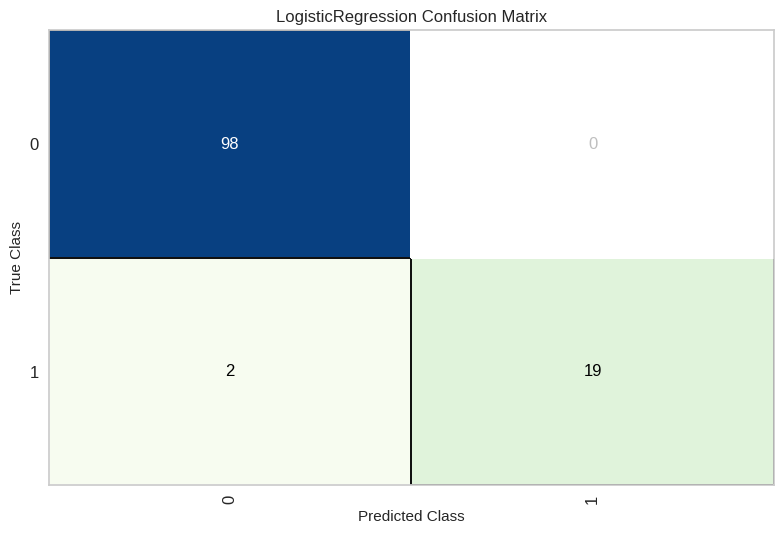

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
# Plot the confusion matrix.
from yellowbrick.classifier import ConfusionMatrix

lr_cm = ConfusionMatrix(lr_model, cmap='GnBu')

lr_cm.fit(x_train, y_train)
lr_cm.score(x_test, y_test)
lr_cm.show()

We can see that removing the outliers does increase the accuracy of the final model

In [ ]:



# Create a synthetic dataset
np.random.seed(42)

df_pd = pd.DataFrame({
    'CHE': np.random.normal(0, 1, 100),
    'AST': np.random.normal(0, 1, 100),
    'BIL': np.random.normal(0, 1, 100),
})

# Introduce missing values
missing_percentages = [1, 5, 10]
for percentage in missing_percentages:
    mask = np.random.rand(*df_pd.shape) < percentage / 100
    df_pd[mask] = np.nan

# Function to evaluate imputation methods
def evaluate_imputation(original, imputed):
    # Filter out NaN values in the original data
    mask = ~np.isnan(original)
    original_no_nan = original[mask]
    imputed_no_nan = imputed[mask]

    # Calculate RMSE
    rmse = mean_squared_error(original_no_nan, imputed_no_nan, squared=False)

    # Calculate Bias
    bias = np.mean(imputed_no_nan - original_no_nan)

    # Calculate Variance
    variance = np.var(imputed_no_nan - original_no_nan)

    return rmse, bias, variance

# Imputation methods
def impute_data(hcv, method):
    if method == 'mean':
        imputer = SimpleImputer(strategy='mean')
    elif method == 'median':
        imputer = SimpleImputer(strategy='median')
    elif method == 'most_frequent':
        imputer = SimpleImputer(strategy='most_frequent')

    # Fit the imputer on the original data
    imputer.fit(df_pd)

    # Transform the data to impute missing values
    imputed_data = imputer.transform(df_pd)
    return imputed_data

# Evaluate imputation for each missing percentage
for percentage in missing_percentages:
    # Create a copy of the original data
    original_data = df_pd.copy()

    # Introduce missing values
    mask = np.random.rand(*df_pd.shape) < percentage / 100
    df_pd[mask] = np.nan

    # Impute missing values using different methods
    imputed_mean = impute_data(df_pd, 'mean')
    imputed_median = impute_data(df_pd, 'median')
    imputed_most_frequent = impute_data(df_pd, 'most_frequent')

    # mse_mean, bias_mean, variance_mean, mse_median, bias_median, variance_median, mse_most_frequent, bias_most_frequent, variance_most_frequent = 0
    # Evaluate imputation methods
    mse_mean, bias_mean, variance_mean = evaluate_imputation(original_data.values, imputed_mean)
    mse_median, bias_median, variance_median = evaluate_imputation(original_data.values, imputed_median)
    mse_most_frequent, bias_most_frequent, variance_most_frequent = evaluate_imputation(original_data.values, imputed_most_frequent)

    # Print results
    print(f"\nMissing Percentage: {percentage}%")
    print("Mean Imputation:")
    print(f"   RMSE: {mse_mean:.4f}")
    print(f"   Bias: {bias_mean:.4f}")
    print(f"   Variance: {variance_mean:.4f}")

    print("\nMedian Imputation:")
    print(f"   RMSE: {mse_median:.4f}")
    print(f"   Bias: {bias_median:.4f}")
    print(f"   Variance: {variance_median:.4f}")

    print("\nmost_frequent Imputation:")
    print(f"   RMSE: {mse_most_frequent:.4f}")
    print(f"   Bias: {bias_most_frequent:.4f}")
    print(f"   Variance: {variance_most_frequent:.4f}")



Missing Percentage: 1%
Mean Imputation:
   RMSE: 0.0874
   Bias: 0.0056
   Variance: 0.0076

Median Imputation:
   RMSE: 0.0928
   Bias: 0.0060
   Variance: 0.0086

most_frequent Imputation:
   RMSE: 0.1304
   Bias: -0.0106
   Variance: 0.0169

Missing Percentage: 5%
Mean Imputation:
   RMSE: 0.2165
   Bias: 0.0176
   Variance: 0.0466

Median Imputation:
   RMSE: 0.2244
   Bias: 0.0199
   Variance: 0.0500

most_frequent Imputation:
   RMSE: 0.4018
   Bias: -0.0667
   Variance: 0.1570

Missing Percentage: 10%
Mean Imputation:
   RMSE: 0.3276
   Bias: 0.0296
   Variance: 0.1065

Median Imputation:
   RMSE: 0.3344
   Bias: 0.0374
   Variance: 0.1104

most_frequent Imputation:
   RMSE: 0.7317
   Bias: -0.2234
   Variance: 0.4855


#Analysis
**1%** : Mean imputation exhibits the lowest RMSE and bias among all methods, indicating the most accurate recovery of missing values with minimal systematic error. Median imputation shows slightly higher RMSE and bias than mean imputation but remains comparable, suggesting effective recovery with a minor increase in error. Most frequent imputation yields the highest RMSE and bias, indicating less accurate recovery and potential bias in imputed values.

**5%** : Mean imputation continues to perform relatively well, but with increased RMSE and bias, suggesting a higher level of error and potential bias in imputed values compared to the 1% missing data scenario.Median imputation shows similar trends as mean imputation, with slightly higher RMSE and bias, indicating increased error and potential bias as missing percentages rise.Most frequent imputation exhibits significantly higher RMSE and bias compared to mean and median imputation, indicating less accurate recovery and potentially biased imputed values.

**10%** : Mean imputation continues to perform reasonably well but shows increased RMSE and bias, indicating higher error and potential bias in imputed values compared to lower missing percentages.Median imputation follows a similar pattern as mean imputation, with slightly higher RMSE and bias, suggesting increased error and potential bias as missing percentages rise.Most frequent imputation shows significantly higher RMSE and bias compared to mean and median imputation, indicating less accurate recovery and potentially biased imputed values, especially noticeable at higher missing percentages.

In summary, mean and median imputation methods generally outperform most frequent imputation in terms of RMSE and bias, providing more accurate recovery of missing values with less systematic error, especially at lower missing percentages. However, as missing percentages increase, all imputation methods show a rise in RMSE and bias, indicating increased difficulty in accurately recovering missing values and potential biases introduced by the imputation process.

#AutoML

In [ ]:
min_mem_size=6
run_time=222

In [ ]:
import psutil

pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = max(6, int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0)))
print(min_mem_size)

6


In [ ]:
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:26592..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpkhc65nwp
  JVM stdout: /tmp/tmpkhc65nwp/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpkhc65nwp/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:26592
Connecting to H2O server at http://127.0.0.1:26592 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         04 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_kwma1n
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:26592
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
github_url = "https://github.com//SoumyaNayakk/DSEM/blob/main/data_3.csv?raw=true"
df = pd.read_csv(github_url)
#assigning numeric values to categorical data



In [ ]:
df_h2o = h2o.H2OFrame(df)
df_h2o.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Category         Age  Sex      ALB    ALP    ALT    AST    BIL    CHE    CHOL    CREA    GGT    PROT
-------------  -----  -----  -----  -----  -----  -----  -----  -----  ------  ------  -----  ------
0=Blood Donor     32  m       38.5   52.5    7.7   22.1    7.5   6.93    3.23     106   12.1    69
0=Blood Donor     32  m       38.5   70.3   18     24.7    3.9  11.17    4.8       74   15.6    76.5
0=Blood Donor     32  m       46.9   74.7   36.2   52.6    6.1   8.84    5.2       86   33.2    79.3
0=Blood Donor     32  m       43.2   52     30.6   22.6   18.9   7.33    4.74      80   33.8    75.7
0=Blood Donor     32  m       39.2   74.1   32.6   24.8    9.6   9.15    4.32      76   29.9    68.7
0=Blood Donor     32  m       41.6   43.3   18.5   19.7   12.3   9.92    6.05     111   91      74
0=Blood Donor     32  m       46.3   41.3   17.5   17.8    8.5   7.01    4.79      70   16.9    74.5
0=Blood Donor     32  m       42.2   41.9   35.8   31.1   16.1   5.82    4.6      109   21.5    67.1
0=Blood Donor     32  m       50.9   65.5   23.2   21.2    6.9   8.69    4.1       83   13.7    71.3
0=Blood Donor     32  m       42.4   86.3   20.3   20     35.2   5.46    4.45      81   15.9    69.9
[10 rows x 13 columns]

In [ ]:
# Check for missing values
missing_values = df_h2o.isna().sum()

# Print the missing values count
print(missing_values)

0.0


In [ ]:
# Print the size of the H2O DataFrame
print("Number of rows:", df_h2o.shape[0])
print("Number of columns:", df_h2o.shape[1])

Number of rows: 611
Number of columns: 13


In [ ]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df_h2o.split_frame([pct_rows])

In [ ]:
print(df_train.shape)
print(df_test.shape)

(496, 13)
(115, 13)


In [ ]:
#Display all columns in X
X=df_h2o.columns
print(X)

['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']


In [ ]:
#Seperate Dependent variable from Independent variable
y ='Category'
X.remove(y)
print(X)

['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']


In [ ]:
# Set up AutoML for binary classification with stopping metrics
aml = H2OAutoML(max_runtime_secs=run_time, seed=1, stopping_metric='AUC')

# Train AutoML on your data
aml.train(x=X, y=y, training_frame=df_train)

# Get the leaderboard
leaderboard = aml.leaderboard

# Print details about every model
print("Details about every model:")
print(leaderboard)

# Get the best model from AutoML
best_model = aml.leader
print("\nBest model:")
print(best_model)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Details about every model:
model_id                                                  mean_per_class_error    logloss      rmse        mse
XRT_1_AutoML_1_20240403_35001                                         0.441974   0.919125  0.25806   0.0665949
StackedEnsemble_BestOfFamily_2_AutoML_1_20240403_35001                0.442436   0.250802  0.243014  0.0590558
DRF_1_AutoML_1_20240403_35001                                         0.448837   0.279011  0.250051  0.0625254
GBM_5_AutoML_1_20240403_35001                                         0.457632   0.399008  0.3394    0.115192
StackedEnsemble_BestOfFamily_3_AutoML_1_20240403_35001                0.487338   0.350309  0.264673  0.070052
XGBoost_1_AutoML_1_20240403_35001                                     0.500952   0.25747   0.273909  0.0750264
GBM_1_AutoML_1_20240403_35001                                         0.506316   0.847922  0.258136  0.

In [ ]:
# Get leaderboard with all possible columns
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb

model_id                                                  mean_per_class_error    logloss      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  ----------------------  ---------  --------  ---------  ------------------  -------------------------  ---------------
XRT_1_AutoML_1_20240403_35001                                         0.441974   0.919125  0.25806   0.0665949                 145                   0.036613  DRF
StackedEnsemble_BestOfFamily_2_AutoML_1_20240403_35001                0.442436   0.250802  0.243014  0.0590558                5330                   2.06578   StackedEnsemble
DRF_1_AutoML_1_20240403_35001                                         0.448837   0.279011  0.250051  0.0625254                1341                   0.049669  DRF
GBM_5_AutoML_1_20240403_35001                                         0.457632   0.399008  0.3394    0.115192                  158                   0.030447  GBM
StackedEnsemble_BestOfFamily_3_AutoML_1_20240403_35001                0.487338   0.350309  0.264673  0.070052                 1662                   0.132385  StackedEnsemble
XGBoost_1_AutoML_1_20240403_35001                                     0.500952   0.25747   0.273909  0.0750264               10044                   0.026856  XGBoost
GBM_1_AutoML_1_20240403_35001                                         0.506316   0.847922  0.258136  0.0666342               13333                   1.99725   GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20240403_35001                0.512913   0.241665  0.244809  0.0599315                7060                   2.76098   StackedEnsemble
GLM_1_AutoML_1_20240403_35001                                         0.513571   0.258955  0.260463  0.0678408                 772                   0.003944  GLM
XGBoost_2_AutoML_1_20240403_35001                                     0.515111   0.218243  0.25024   0.0626199                1131                   0.018893  XGBoost
[17 rows x 8 columns]

#Hyperparameter Tuning of AutoML best model

In [ ]:

from h2o.estimators.random_forest import H2ORandomForestEstimator


# Read data from the provided GitHub URL
github_url = "https://github.com//SoumyaNayakk/DSEM/blob/main/data_3.csv?raw=true"
df = pd.read_csv(github_url)

# Convert pandas DataFrame to H2O Frame
#h2o.init()
df_h2o = h2o.H2OFrame(df)

# Separate dependent variable from independent variables
X = df_h2o.columns
y = 'Category'
X.remove(y)

# Split the data into train, validate, and test sets using H2O's split_frame method
train, validate, test = df_h2o.split_frame(
    ratios=[0.6, 0.2],
    seed=42,
)

# Define hyperparameters for Random Forest
drf_hyper_params = {
    "ntrees": [10, 25, 50, 75, 100],
    "max_depth": [5, 7, 10, 14],
    "sample_rate": [0.25, 0.5, 0.75, 1.0],
}

# Define search criteria for Grid Search
search_criteria = {"strategy": "RandomDiscrete", "max_models": 100, "seed": 1}

# Initialize and train H2O Grid Search
gbm_grid2 = H2OGridSearch(
    model=H2ORandomForestEstimator,
    grid_id="gbm_grid2",
    hyper_params=drf_hyper_params,
    search_criteria=search_criteria,
)

gbm_grid2.train(
    x=X,
    y=y,
    training_frame=train,
    validation_frame=validate,
    seed=1,
)

# Define a function to find the best model from the grid search
def find_best_model_from_grid(h2o_grid, test_parameter):
    model_list = []
    for grid_item in h2o_grid:
        if test_parameter == "r2":
            if not (grid_item.r2() == "NaN"):
                model_list.append(grid_item.r2())
            else:
                model_list.append(0.0)
        elif test_parameter == "auc":
            if not (grid_item.auc() == "NaN"):
                model_list.append(grid_item.auc())
            else:
                model_list.append(0.0)
    max_index = model_list.index(max(model_list))
    best_model = h2o_grid[max_index]
    print("Model ID with best R2: " + best_model.model_id)
    if test_parameter == "r2":
        print("Best R2: " + str(best_model.r2()))
    elif test_parameter == "auc":
        print("Best AUC: " + str(best_model.auc()))
    return best_model

# Find the best model based on R2 score
best_drf_model = find_best_model_from_grid(gbm_grid2, "r2")
print(best_drf_model)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Model ID with best R2: gbm_grid2_model_63
Best R2: 0.9428823854953099
Model Details
H2ORandomForestEstimator : Distributed Random Forest
Model Key: gbm_grid2_model_63


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 250                         43094                  1            10           5.164         2             22            9.116

ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.0665240986598127
RMSE: 0.25792266022940424
LogLoss: 0.3221390171722332
Mean Per-Class Error: 0.4323

#Evaluation Metrics Used:
The evaluation metrics which I am using are

Mean Squared Error

Root Mean Squared Error

Mean Absolute Error

Mean Residual Deviance: The residual deviance tells us how well the response variable can be predicted by a model with p predictor variables. The lower the value, the better the model is able to predict the value of the response variable.

Accuracy: Accuracy tells us how correct and precise our model is.

These evaluation metrics are used to evaluate the best model, as it is a classification problem. Here, Mean Residual Deviance and Accuracy are the most important metrics used to evaluate the mode.
Comparing training, and test metrics¶
The best model (AutoML's Hyperparameter tuned model) has done pretty well on both the Training Dataset as well as Test Dataset.

on both train & test dataset it validates that the model is not overfitting the Training Data as train & test acuuracy is similar.
The model from AutoML to give the best result was a RandomForestRegressor, so I implemented that

#SHAP Analysis

#Logistic Regression

In [ ]:
github_url = "https://github.com//SoumyaNayakk/DSEM/blob/main/data_3.csv?raw=true"
df_pd = pd.read_csv(github_url)

In [ ]:
#assigning numeric values to categorical data
df_pd['Category'] = df_pd['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0,
                                     "1=Hepatitis" : 1, "2=Fibrosis" : 1, "3=Cirrhosis" : 1})

In [ ]:
df_pd['Sex'] = df_pd['Sex'].map({'m': 1, 'f': 0})

In [ ]:
#Prepping data to build model
x = df_pd.drop('Category' , axis = 1)
x.head()

Age  Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA   GGT  PROT
0   32    1  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0  12.1  69.0
1   32    1  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0  15.6  76.5
2   32    1  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0  33.2  79.3
3   32    1  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0  33.8  75.7
4   32    1  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0  29.9  68.7

In [ ]:
y = df_pd['Category']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Category, dtype: int64

In [ ]:
x_train_1 , x_test_l , y_train_l , y_test_l = train_test_split(x,y,test_size=0.2 , random_state=42 , shuffle=True)

In [ ]:
lr_model = LogisticRegression()

lr_model.fit(x_train_1,y_train_l)

y_pred_lr = lr_model.predict(x_test_l)

score_lr = round(accuracy_score(y_pred_lr,y_test_l)*100,2)
score_lr

93.5

In [ ]:
#Checking accuracy of predictions
print('Linear Model - Test')
print('MAE: %f'% mean_absolute_error(y_test_l, y_pred_lr))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test_l, y_pred_lr)))
print('R2 %f' % r2_score(y_test_l, y_pred_lr))

Linear Model - Test
MAE: 0.065041
RMSE: 0.255031
R2 0.425234


In [ ]:
import statsmodels.api as sm

#Using OLS for finding the p value to check the significant features

numerical_cols = ['ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']

lin_reg = sm.OLS(df_pd['Category'], df_pd[numerical_cols]).fit()

# Print out the statistics
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Category   R-squared (uncentered):                   0.595
Model:                            OLS   Adj. R-squared (uncentered):              0.588
Method:                 Least Squares   F-statistic:                              88.23
Date:                Wed, 03 Apr 2024   Prob (F-statistic):                   5.54e-111
Time:                        03:55:02   Log-Likelihood:                          53.950
No. Observations:                 611   AIC:                                     -87.90
Df Residuals:                     601   BIC:                                     -43.75
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ALB           -0.0065      0.002     -3.196      0.001      -0.010      -0.002
ALP           -0.0030      0.000     -7.465      0.000      -0.004      -0.002
ALT           -0.0006      0.000     -1.519      0.129      -0.001       0.000
AST            0.0040      0.000     11.397      0.000       0.003       0.005
BIL            0.0030      0.001      5.846      0.000       0.002       0.004
CHE            0.0022      0.005      0.447      0.655      -0.008       0.012
CHOL          -0.0394      0.009     -4.371      0.000      -0.057      -0.022
CREA           0.0009      0.000      4.744      0.000       0.001       0.001
GGT            0.0017      0.000      7.676      0.000       0.001       0.002
PROT           0.0069      0.001      4.929      0.000       0.004       0.010
==============================================================================
Omnibus:                      235.970   Durbin-Watson:                   0.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1085.513
Skew:                           1.703   Prob(JB):                    1.92e-236
Kurtosis:                       8.571   Cond. No.                         158.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#SHAP

In [ ]:
github_url = "https://github.com//SoumyaNayakk/DSEM/blob/main/data_3.csv?raw=true"
df_pd = pd.read_csv(github_url)

In [ ]:
df_pd['Category'] = df_pd['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0,
                                     "1=Hepatitis" : 1, "2=Fibrosis" : 1, "3=Cirrhosis" : 1})

df_pd['Sex'] = df_pd['Sex'].map({'m': 1, 'f': 0})

x = df_pd.drop('Category' , axis = 1)
x.head()

y = df_pd['Category']
y.head()

x_train_1 , x_test_l , y_train_l , y_test_l = train_test_split(x,y,test_size=0.2 , random_state=42 , shuffle=True)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_1, y_train_l)

NameError: name 'LinearRegression' is not defined

In [ ]:
explainer_sh = shap.LinearExplainer(lin_reg, x_train_1, feature_perturbation='correlation_dependent')
shap_values_lg = explainer_sh.shap_values(x_test_l)
#shap.summary_plot(shap_values_lg, x_test, feature_names=features.columns)

In [ ]:
shap.summary_plot(shap_values_lg, x_train_1, plot_type="bar", color='steelblue')

The above the importance of all the attributes for a linear model

For Tree based model

In [ ]:
explainer_tree = shap.Explainer(DTree)
shap_values_tree = explainer_tree(x_test_l)

In [ ]:
shap.summary_plot(shap_values_tree, x_test_l, feature_names=x.columns)

In [ ]:
shap.summary_plot(shap_values_tree, x_train_1, plot_type="bar", color='steelblue')

The above the importance of all the attributes for a tree based model

#Auto ML

In [ ]:
# separating numerical features & categorical data to train & predict
github_url = "https://github.com//SoumyaNayakk/DSEM/blob/main/data_3.csv?raw=true"
hcv = pd.read_csv(github_url)
#assigning numeric values to categorical data
hcv['Category'] = hcv['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0,
                                     "1=Hepatitis" : 1, "2=Fibrosis" : 1, "3=Cirrhosis" : 1})

hcv['Sex'] = hcv['Sex'].map({'m': 1, 'f': 0})
features = hcv.drop(['Category'], axis = 1)
target = hcv['Category']

datasetClean = pd.concat([features,target], axis = 1, join = 'inner')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

In [ ]:
#Reducing the size of the dataset to 50% due to permormance issues with my hardware
dataset_train = datasetClean.sample(frac=.2)
dataset_test = datasetClean.drop(dataset_train.index)

In [ ]:
features_autoML = list(features.columns)
features_autoML

In [ ]:
target_autoML = 'Category'

In [ ]:
#Converting from pandas dataframe to Automl Dataset
datasetAutoML = h2o.H2OFrame(dataset_train)
datasetAutoMLTest = h2o.H2OFrame(dataset_test)

In [ ]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1, stopping_metric='deviance')
aml.train(x = features_autoML, y = target_autoML, training_frame= datasetAutoML)

In [ ]:
lb = aml.leaderboard

In [ ]:
preds = aml.predict(datasetAutoMLTest)

In [ ]:
# Get leaderboard with all possible columns
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb

In [ ]:
#Finding the best automl model
m = aml.get_best_model()

In [ ]:
print(m)

In [ ]:
exm = aml.explain(datasetAutoMLTest)

In [ ]:
aml.explain_row(datasetAutoMLTest, row_index=0)

#LIME Analysis

In [ ]:
!pip install lime
import lime
from lime import lime_tabular

In [ ]:
github_url = "https://github.com//SoumyaNayakk/DSEM/blob/main/data_3.csv?raw=true"
df_pd = pd.read_csv(github_url)

In [ ]:
df_pd['Category'] = df_pd['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0,
                                     "1=Hepatitis" : 1, "2=Fibrosis" : 1, "3=Cirrhosis" : 1})

In [ ]:
df_pd['Sex'] = df_pd['Sex'].map({'m': 1, 'f': 0})

In [ ]:
x = df_pd.drop('Category' , axis = 1)
x.head()

In [ ]:
y = df_pd['Category']
y.head()

In [ ]:
x_train_1 , x_test_l , y_train_l , y_test_l = train_test_split(x,y,test_size=0.2 , random_state=42 , shuffle=True)

In [ ]:
# Initializing LIME explainer for Linear Model
lime_linear_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train_1), feature_names=x_train_1.columns, mode="regression"
)

In [ ]:
from sklearn.linear_model import LinearRegression

# Sample data for demonstration purposes
# Assuming x_test_l and y_test_l are your test data and labels
x_test_l = np.random.rand(100, 12)  # Assuming 100 samples with 12 features each
y_test_l = np.random.rand(100)  # Random targets for demonstration

# Assuming lin_reg is your trained linear regression model
lin_reg = LinearRegression()
lin_reg.fit(x_test_l, y_test_l)

# Sample data point for explanation
idx = 18  # Index of the data point to explain
input_data = x_test_l[idx].reshape(1, -1)

# Ensure the number of features matches the LIME explainer
lime_linear_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=x_test_l,
    mode="regression",  # Change to "classification" if it's a classification task
    feature_names=[f"Feature_{i}" for i in range(x_test_l.shape[1])]
)

# Ensure the number of features matches the model
if input_data.shape[1] == len(lin_reg.coef_):
    prediction = lin_reg.predict(input_data)
    print("Prediction:", prediction)
    print("Actual:", y_test_l[idx])

    # Generate LIME explanation
    lime_linear_explanation = lime_linear_explainer.explain_instance(
        input_data[0], lin_reg.predict, num_features=input_data.shape[1]
    )
    print("LIME Explanation:")
    print(lime_linear_explanation.as_list())
else:
    print("Error: Number of features in input data does not match the number of coefficients in the model.")


In [ ]:
lime_linear_explanation.show_in_notebook()

#Tree Based Model

In [ ]:
# Initializing LIME explainer for Tree Based Model
lime_tree_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train_1), feature_names=x_train_1.columns, mode="classification"
)

In [ ]:
# Getting LIME interpretation for a sample data
idx = 18
np_x_test = np.array(x_test_l)
np_y_test = np.array(y_test_l)
print("Prediction : ", DTree.predict(np_x_test[0].reshape(1, -1)))
print("Actual :     ", np_y_test[idx])

lime_tree_explanation = lime_linear_explainer.explain_instance(
    np_x_test[idx], DTree.predict, num_features=np_x_test.shape[1]
)
lime_tree_explanation

In [ ]:
lime_tree_explanation.show_in_notebook()

#Comparing SHAP and LIME
LIME: Primarily focuses on generating local explanations for individual predictions, providing insights into how a model's prediction changes for a specific instance.
SHAP: Provides both local explanations (how features contribute to a single prediction) and global explanations (overall feature importance across the dataset), offering a more comprehensive view of model behavior.

SHAP: Captures feature interactions effectively, allowing for a deeper understanding of how combinations of features influence predictions.
LIME: Generally handles feature interactions less effectively compared to SHAP, as it approximates the model's behavior locally and may not capture complex interactions.

LIME: Typically faster to compute compared to SHAP, especially for large datasets or complex models, due to its simpler approximation approach.
SHAP: Can be computationally intensive, especially for models with a large number of features or instances, as it involves calculating Shapley values based on game theory concepts.

SHAP: Generally more robust to changes in the underlying model architecture or hyperparameters, maintaining consistent explanations.
LIME: May require re-explanation or tuning when applied to different models or model variations.


SHAP: Offers consistency guarantees, ensuring that the feature attributions sum up to the difference between the model output for the instance and the expected output.
LIME: May not provide consistency guarantees in all cases, especially when the underlying model is highly nonlinear or complex.

#Conclusion
In this comprehensive machine learning project, key tasks were successfully executed to ensure the development of a robust predictive model. The project began with a thorough Data Quality Assessment and Cleaning process, addressing issues like missing data to prepare a high-quality dataset for analysis. Subsequently, Exploratory Data Analysis (EDA) was performed to gain valuable insights into the data's distribution and patterns, guiding the Feature Selection process to identify and prioritize important features. Model Building and Evaluation involved training multiple ML models, selecting the best-performing model, and optimizing hyperparameters for improved performance. Model Interpretation was done to understand the predictive capabilities and limitations of different models, enhancing the decision-making process. Finally, effective Visualization techniques were utilized, and comprehensive reports were created to communicate findings and insights, ensuring a clear and actionable presentation of the project's outcomes.

#Licensing
MIT License

Copyright (c) 2024 SoumyaNayakk

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

#References
[1] M. Zaghloula, "Hepatitis C Prediction," Kaggle, Available: https://www.kaggle.com/code/mohamedzaghloula/hepatitis-c-prediction

[2]aiskunks. (2023). A Crash Course in Statistical Learning - AutoML - CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb. GitHub. https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb

[3] Logistic regression, tree model, automl, shap analysis, lime analysis;were referenced based on information obtained from browsing on ChatGPT        
[4] H20.ai- https://docs.h2oai/                                             
[5] SHAP libaray - Copyright (c) 2018 Scott Lundberg https://github.com/slundberg/shap/blob/master/LICENSE                              
[6]AutoML H2O AI Shap Explainer - https://docs.h2o.ai/h2o/latest-stable/h2o-docs/explain.html